In [ ]:
df = all_dfs_1986to2000
selected_breaks = [7/365.25, 14/365.25, 21/365.25, 28/365.25, 35/365.25, 52/365.25, 92/365.25, 
                   184/365.25, 1, 2, 4]

selected_month = 12
if not taxflag:
    fwdcurve_alltypes = {}
    for curve_type, data in df.items():
        curve_df = data['curve_df'].copy()
        curve_df.index = pd.to_datetime(curve_df.index.astype(str), format='ISO8601')
        filtered_curve_df = curve_df[curve_df.index.month == selected_month]
        filtered_curve_df = filtered_curve_df.melt(var_name='Maturity', value_name='Rate', ignore_index=False)
        filtered_curve_df['Year'] = filtered_curve_df.index.year
        filtered_curve_df = filtered_curve_df[filtered_curve_df['Maturity'].isin(selected_breaks)]
        fwdcurve_alltypes[curve_type] = filtered_curve_df
    fwdcurve_alltypes = pd.concat(fwdcurve_alltypes.values(), keys=fwdcurve_alltypes.
                                keys()).reset_index(level=0).rename(columns={'level_0': 'Curve Type'})
# Loop through dates to create plots

for date in (fwdcurve_alltypes.index.unique()):
    plt.figure(figsize=(10, 6))
    data_for_date = fwdcurve_alltypes[fwdcurve_alltypes.index == date]
    # Loop through each curve type to plot
    for curve_type in data_for_date['Curve Type'].unique():
        subset = data_for_date[data_for_date['Curve Type'] == curve_type]
        plt.plot(subset['Maturity'], subset['Rate'], label=f'{curve_type} - {date.year}')
    plt.title(f'Forward Rates for {date.strftime("%Y-%m-%d")}')
    plt.xlabel('Maturity')
    plt.ylabel('Rate')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'{output_dir}/{date.strftime("%Y-%m-%d")}_forward_rates.png')
    plt.show()
    plt.close()

In [ ]:
import sys

In [ ]:
import sys

In [1]:
import sys

Connected to Python 3.9.10

In [2]:
import sys
import os
import numpy as np
import pandas as pd
import pickle
from openpyxl import Workbook
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
pio.renderers.default='svg'
import datetime
import importlib as imp
import scipy.optimize as so
import scipy.sparse as sp
import time as time
import matplotlib.pyplot as plt
import cProfile

In [3]:
os.chdir("curve_utils/src/development")

In [4]:
sys.path.append('../../src/package')
sys.path.append('../../../BondsTable')
sys.path.append('../../tests')
sys.path.append('../../data')

In [5]:
import DateFunctions_1 as dates
import pvfn as pv
import pvcover as pvc
import discfact as df
import Curve_Plotting as plot
import CRSPBondsAnalysis as analysis
import crsp_data_processing as data_processing
import produce_inputs as inputs
import calculate_ratesprices as outputs
import plot_rates as plot_rates
import util_fn as util
imp.reload(dates)
imp.reload(pv)
imp.reload(pvc)
imp.reload(inputs)
imp.reload(outputs)
imp.reload(plot_rates)
imp.reload(plot)

c:\Users\zhang\OneDrive\Documents\GitHub\UST-yieldcurves_2024\curve_utils\src\development\crsp_data_processing.py:46: DtypeWarning:

Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.

c:\Users\zhang\OneDrive\Documents\GitHub\UST-yieldcurves_2024\curve_utils\src\development\crsp_data_processing.py:241: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\zhang\OneDrive\Documents\GitHub\UST-yieldcurves_2024\curve_utils\src\development\crsp_data_processing.py:244: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

<module 'Curve_Plotting' from 'c:\\Users\\zhang\\OneDrive\\Documents\\GitHub\\UST-yieldcurves_2024\\curve_utils\\src\\development\\../../src/package\\Curve_Plotting.py'>

In [6]:
OUTPUT_DIR = 'C:/Users/zhang/OneDrive/Documents/GitHub/UST-yieldcurves_2024/curve_utils/src/output'

In [7]:
OUTPUT_DIR = '../../output'

In [8]:
calltype = 0  # 0 to keep all bonds, 1 for callable bonds, 2 for non-callable bonds
curvetypes = ['pwcf', 'pwlz', 'pwtf']
start_date = 19860701
start_date = 20000101
end_date = 20001231
breaks = np.array([7/365.25, 14/365.25, 21/365.25, 28/365.25, 35/365.25, 52/365.25, 92/365.25, 
                   184/365.25, 1, 2, 4, 8, 16, 24, 32])  # np.array([0.0833, 0.5, 1.,2.,5.,10.,20.,30.])

curve_points_yr = np.arange(.01,10,.01)

In [9]:
taxflag=False

In [10]:
taxability=1

In [11]:
df = util.load_dfs_from_pickle(dict_file)
df = all_dfs_1986to2000
selected_breaks = [7/365.25, 14/365.25, 21/365.25, 28/365.25, 35/365.25, 52/365.25, 92/365.25, 
                   184/365.25, 1, 2, 4]

selected_month = 12

NameError: name 'dict_file' is not defined

In [12]:
dict_file = '1986to2000'
df = util.load_dfs_from_pickle(dict_file)
df = all_dfs_1986to2000
selected_breaks = [7/365.25, 14/365.25, 21/365.25, 28/365.25, 35/365.25, 52/365.25, 92/365.25, 
                   184/365.25, 1, 2, 4]

selected_month = 12

TypeError: load_dfs_from_pickle() missing 1 required positional argument: 'filename'

In [13]:
dict_file = '1986to2000'
df = util.load_dfs_from_pickle(dict_file)
selected_breaks = [7/365.25, 14/365.25, 21/365.25, 28/365.25, 35/365.25, 52/365.25, 92/365.25, 
                   184/365.25, 1, 2, 4]

selected_month = 12

TypeError: load_dfs_from_pickle() missing 1 required positional argument: 'filename'

In [14]:
dict_file = '1986to2000'
df = util.load_dfs_from_pickle(OUTPUT_DIR, dict_file)
selected_breaks = [7/365.25, 14/365.25, 21/365.25, 28/365.25, 35/365.25, 52/365.25, 92/365.25, 
                   184/365.25, 1, 2, 4]

selected_month = 12

NameError: name 'output_dir' is not defined

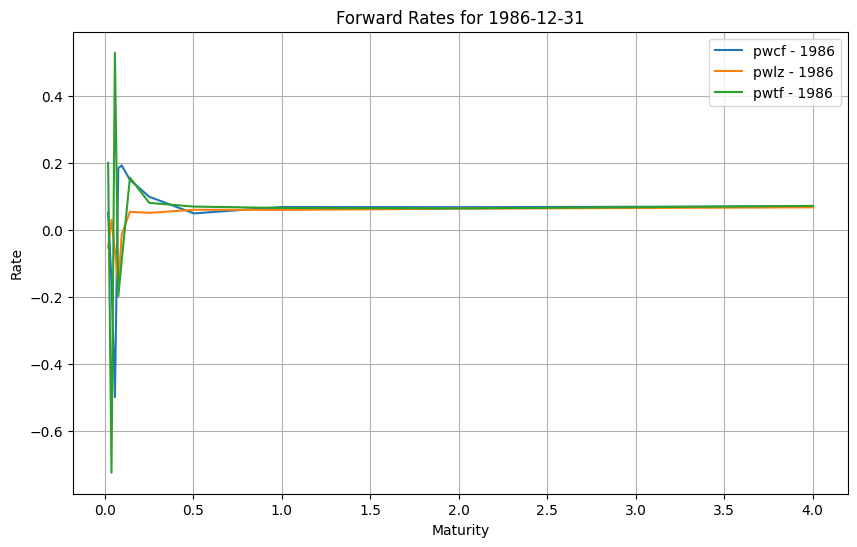

In [15]:
if not taxflag:
    fwdcurve_alltypes = {}
    for curve_type, data in df.items():
        curve_df = data['curve_df'].copy()
        curve_df.index = pd.to_datetime(curve_df.index.astype(str), format='ISO8601')
        filtered_curve_df = curve_df[curve_df.index.month == selected_month]
        filtered_curve_df = filtered_curve_df.melt(var_name='Maturity', value_name='Rate', ignore_index=False)
        filtered_curve_df['Year'] = filtered_curve_df.index.year
        filtered_curve_df = filtered_curve_df[filtered_curve_df['Maturity'].isin(selected_breaks)]
        fwdcurve_alltypes[curve_type] = filtered_curve_df
    fwdcurve_alltypes = pd.concat(fwdcurve_alltypes.values(), keys=fwdcurve_alltypes.
                                keys()).reset_index(level=0).rename(columns={'level_0': 'Curve Type'})
    # Loop through dates to create plots
    for date in (fwdcurve_alltypes.index.unique()):
        plt.figure(figsize=(10, 6))
        data_for_date = fwdcurve_alltypes[fwdcurve_alltypes.index == date]
        # Loop through each curve type to plot
        for curve_type in data_for_date['Curve Type'].unique():
            subset = data_for_date[data_for_date['Curve Type'] == curve_type]
            plt.plot(subset['Maturity'], subset['Rate'], label=f'{curve_type} - {date.year}')
        plt.title(f'Forward Rates for {date.strftime("%Y-%m-%d")}')
        plt.xlabel('Maturity')
        plt.ylabel('Rate')
        plt.legend()
        plt.grid(True)
        plt.savefig(f'{output_dir}/{dict_file}/{date.strftime("%Y-%m-%d")}_forward_rates.png')
        plt.show()
        plt.close()

In [16]:
output_dir = OUTPUT_DIR

FileNotFoundError: [Errno 2] No such file or directory: '../../output/1986to2000/1986-12-31_forward_rates.png'

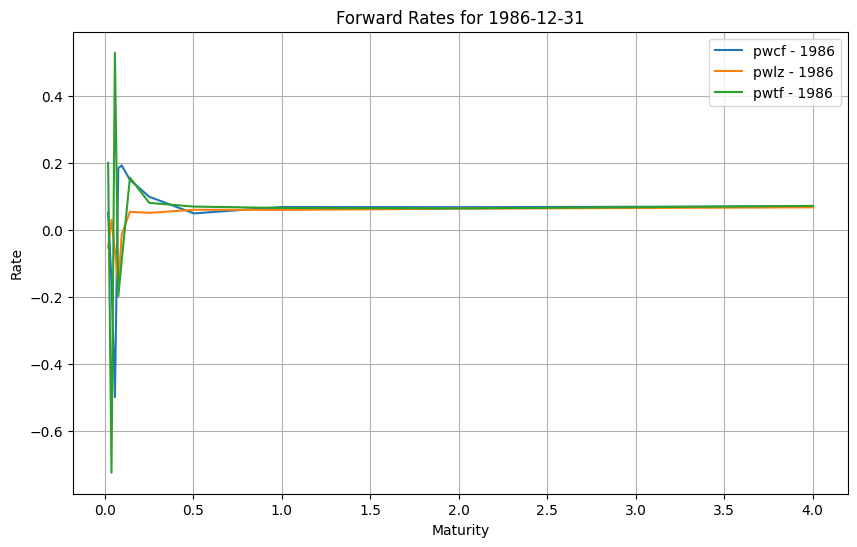

In [17]:
if not taxflag:
    fwdcurve_alltypes = {}
    for curve_type, data in df.items():
        curve_df = data['curve_df'].copy()
        curve_df.index = pd.to_datetime(curve_df.index.astype(str), format='ISO8601')
        filtered_curve_df = curve_df[curve_df.index.month == selected_month]
        filtered_curve_df = filtered_curve_df.melt(var_name='Maturity', value_name='Rate', ignore_index=False)
        filtered_curve_df['Year'] = filtered_curve_df.index.year
        filtered_curve_df = filtered_curve_df[filtered_curve_df['Maturity'].isin(selected_breaks)]
        fwdcurve_alltypes[curve_type] = filtered_curve_df
    fwdcurve_alltypes = pd.concat(fwdcurve_alltypes.values(), keys=fwdcurve_alltypes.
                                keys()).reset_index(level=0).rename(columns={'level_0': 'Curve Type'})
    # Loop through dates to create plots
    for date in (fwdcurve_alltypes.index.unique()):
        plt.figure(figsize=(10, 6))
        data_for_date = fwdcurve_alltypes[fwdcurve_alltypes.index == date]
        # Loop through each curve type to plot
        for curve_type in data_for_date['Curve Type'].unique():
            subset = data_for_date[data_for_date['Curve Type'] == curve_type]
            plt.plot(subset['Maturity'], subset['Rate'], label=f'{curve_type} - {date.year}')
        plt.title(f'Forward Rates for {date.strftime("%Y-%m-%d")}')
        plt.xlabel('Maturity')
        plt.ylabel('Rate')
        plt.legend()
        plt.grid(True)
        plt.savefig(f'{output_dir}/{dict_file}/{date.strftime("%Y-%m-%d")}_forward_rates.png')
        plt.show()
        plt.close()

In [18]:
path = f"{output_dir}/{dict_file}"
try:
    os.makedirs(path, exist_ok=True)
    print(f"Directory '{path}' created")
except OSError as error:
    print(f"Creation of the directory {path} failed due to: {error}")

Directory '../../output/1986to2000' created


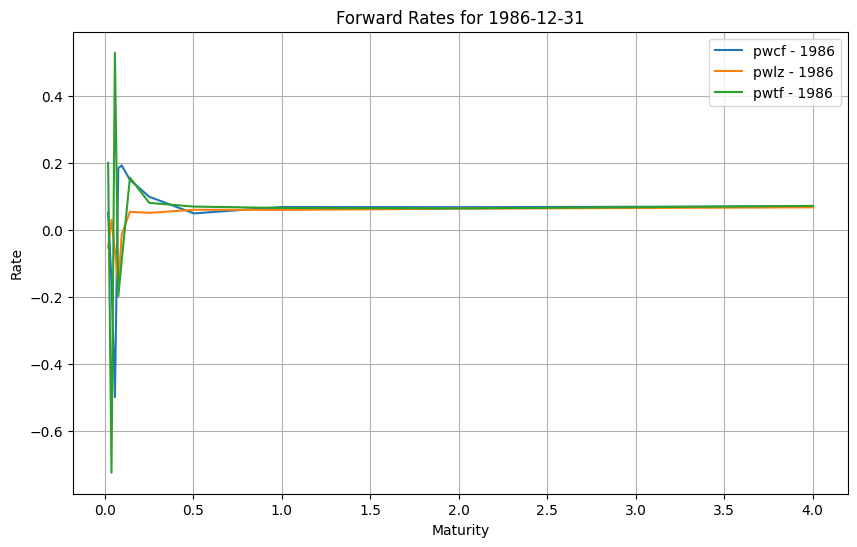

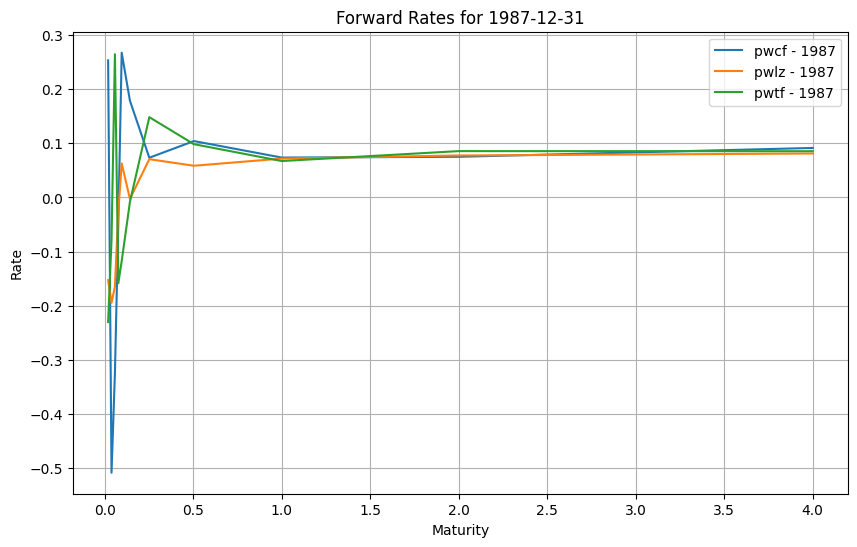

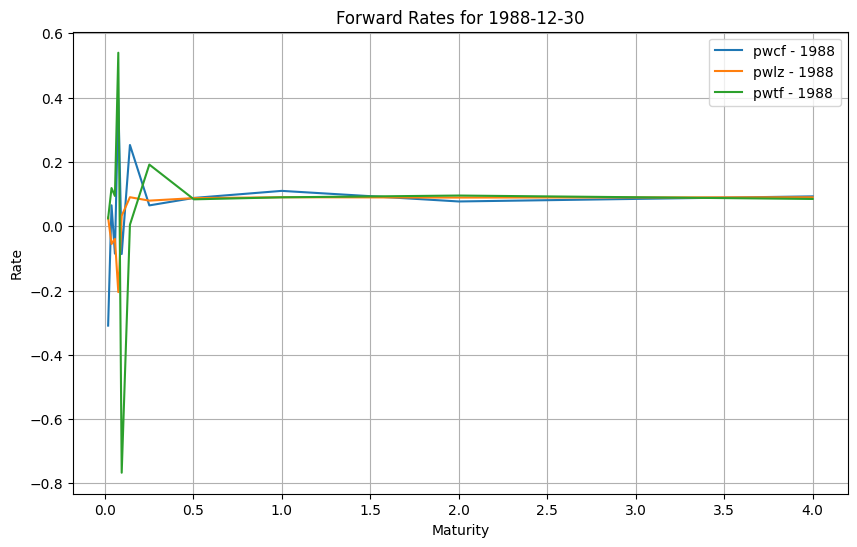

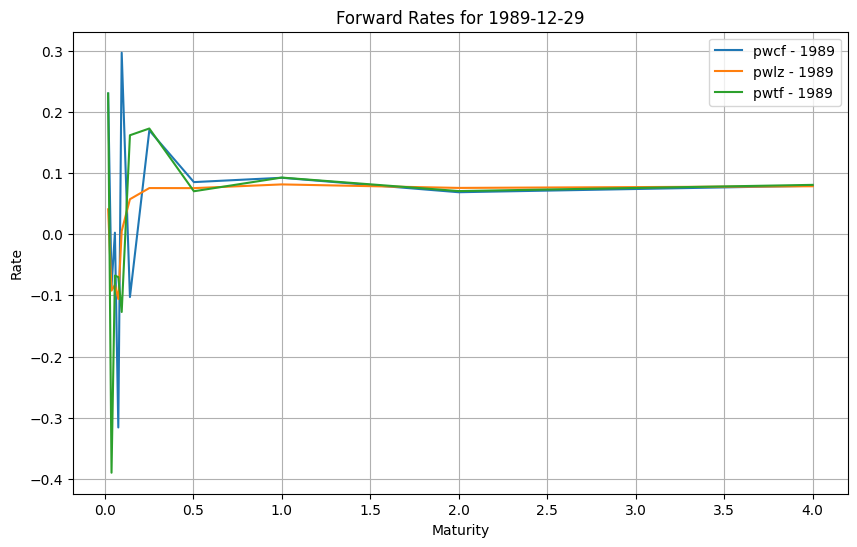

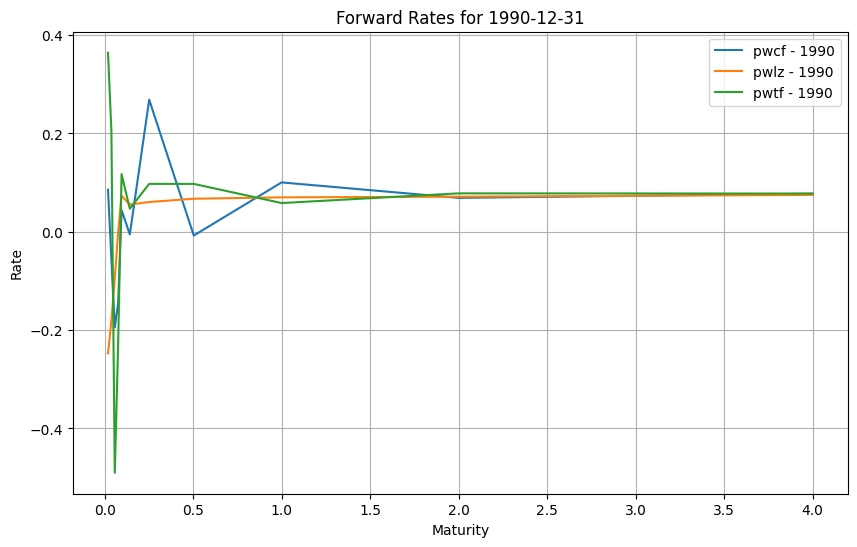

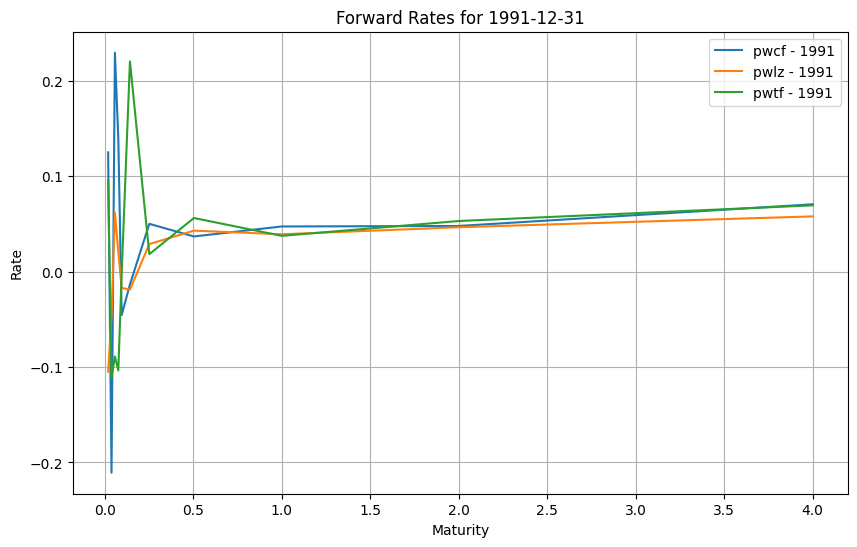

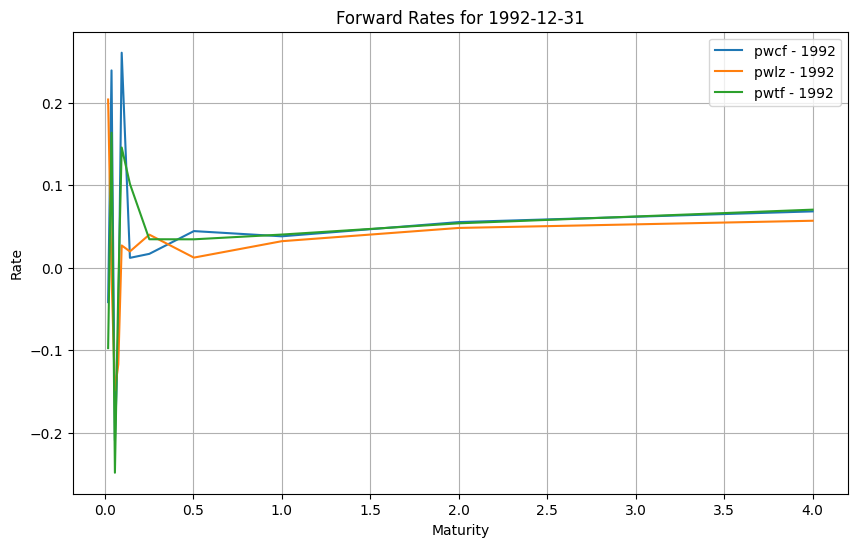

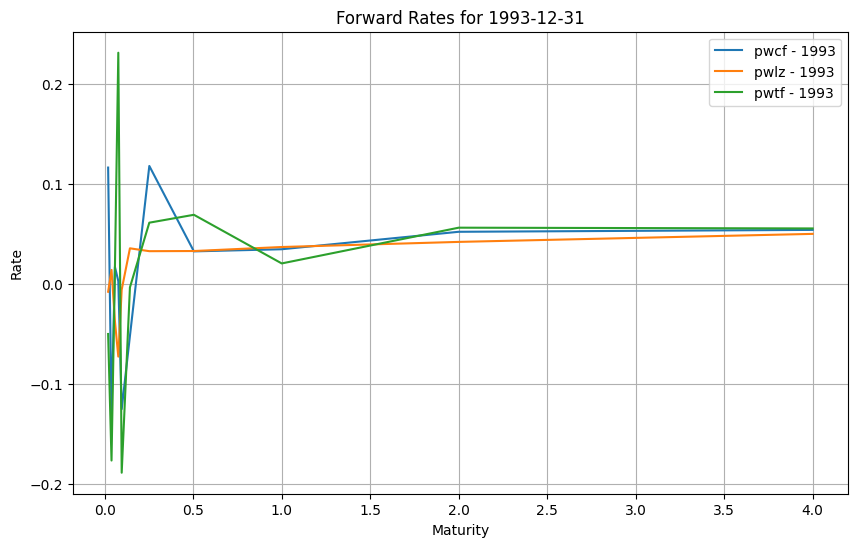

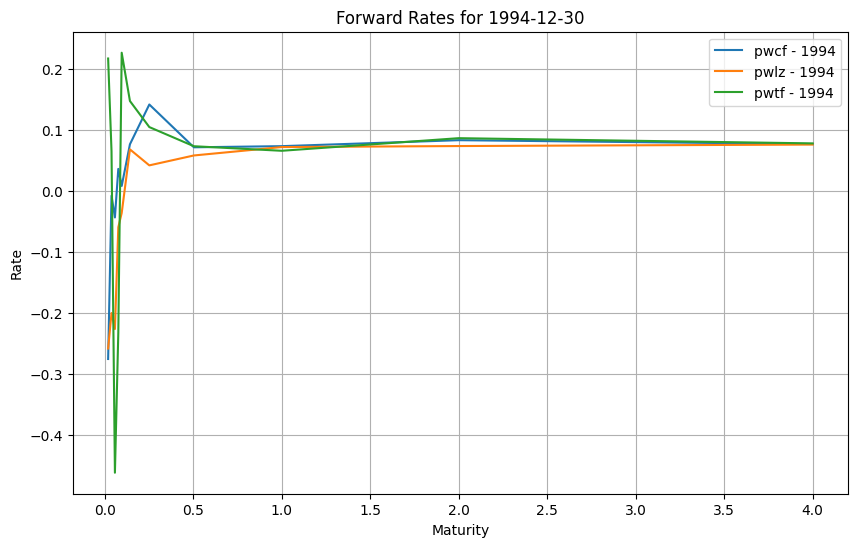

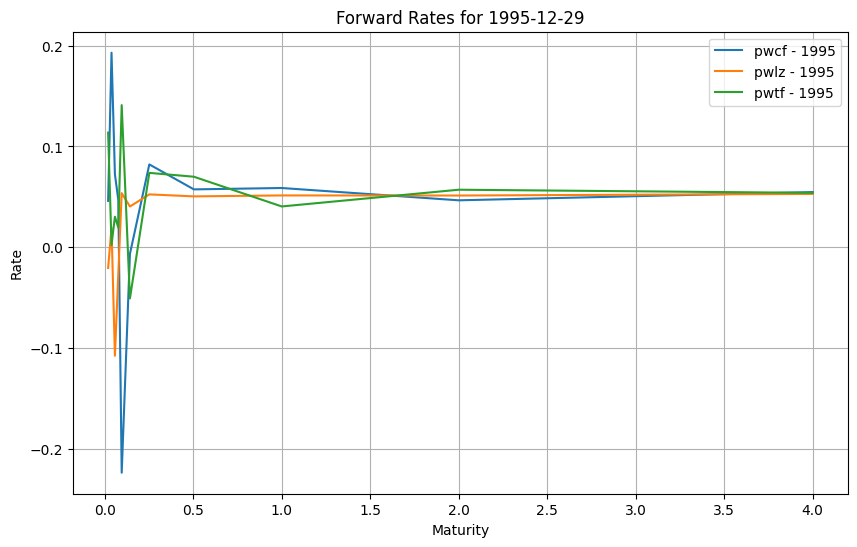

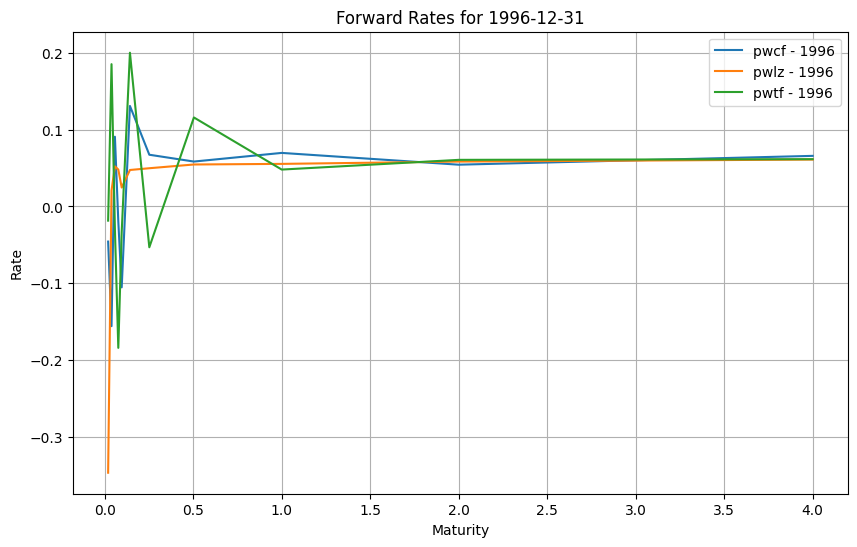

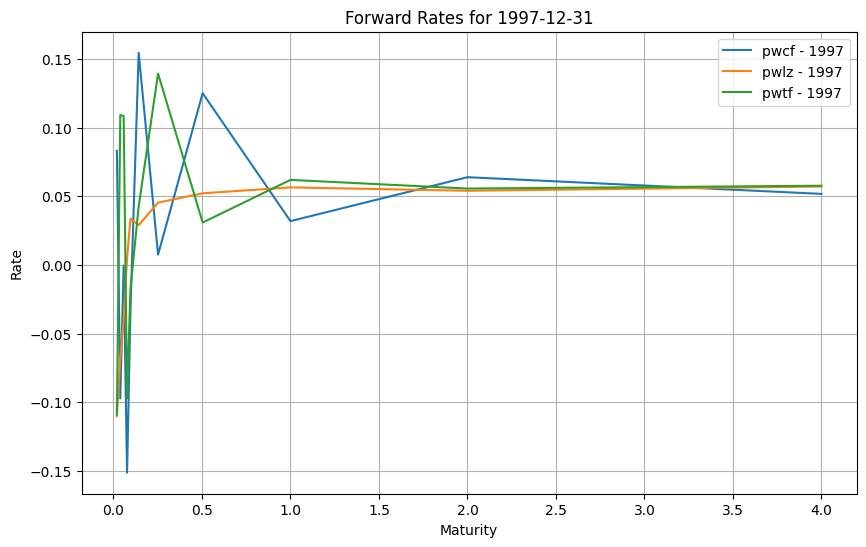

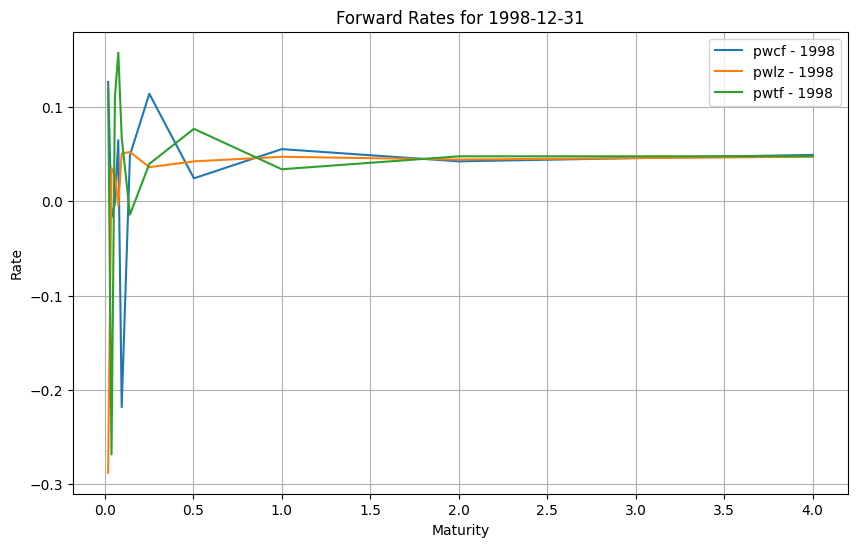

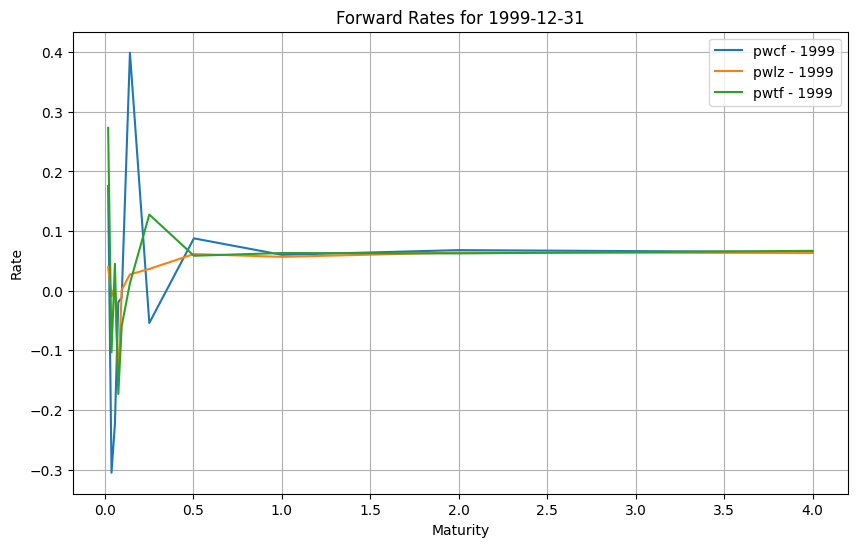

In [19]:
if not taxflag:
    fwdcurve_alltypes = {}
    for curve_type, data in df.items():
        curve_df = data['curve_df'].copy()
        curve_df.index = pd.to_datetime(curve_df.index.astype(str), format='ISO8601')
        filtered_curve_df = curve_df[curve_df.index.month == selected_month]
        filtered_curve_df = filtered_curve_df.melt(var_name='Maturity', value_name='Rate', ignore_index=False)
        filtered_curve_df['Year'] = filtered_curve_df.index.year
        filtered_curve_df = filtered_curve_df[filtered_curve_df['Maturity'].isin(selected_breaks)]
        fwdcurve_alltypes[curve_type] = filtered_curve_df
    fwdcurve_alltypes = pd.concat(fwdcurve_alltypes.values(), keys=fwdcurve_alltypes.
                                keys()).reset_index(level=0).rename(columns={'level_0': 'Curve Type'})
    # Loop through dates to create plots
    for date in (fwdcurve_alltypes.index.unique()):
        plt.figure(figsize=(10, 6))
        data_for_date = fwdcurve_alltypes[fwdcurve_alltypes.index == date]
        # Loop through each curve type to plot
        for curve_type in data_for_date['Curve Type'].unique():
            subset = data_for_date[data_for_date['Curve Type'] == curve_type]
            plt.plot(subset['Maturity'], subset['Rate'], label=f'{curve_type} - {date.year}')
        plt.title(f'Forward Rates for {date.strftime("%Y-%m-%d")}')
        plt.xlabel('Maturity')
        plt.ylabel('Rate')
        plt.legend()
        plt.grid(True)
        plt.savefig(f'{output_dir}/{dict_file}/{date.strftime("%Y-%m-%d")}_forward_rates.png')
        plt.show()
        plt.close()

In [20]:
import plots_to_latex as plotlatex

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'path/to/images'

In [21]:
import plots_to_latex as plotlatex

In [22]:
imp.reload(plotlatex)

<module 'plots_to_latex' from 'c:\\Users\\zhang\\OneDrive\\Documents\\GitHub\\UST-yieldcurves_2024\\curve_utils\\src\\development\\plots_to_latex.py'>

In [23]:
import plots_to_latex as plotlatex

In [24]:
imp.reload(plotlatex)

<module 'plots_to_latex' from 'c:\\Users\\zhang\\OneDrive\\Documents\\GitHub\\UST-yieldcurves_2024\\curve_utils\\src\\development\\plots_to_latex.py'>

In [25]:
plotlatex.create_latex_with_images(OUTPUT_DIR, '1986to2000', '1986to2000.tex')

In [26]:
import plots_to_latex as plotlatex

In [27]:
imp.reload(plotlatex)

<module 'plots_to_latex' from 'c:\\Users\\zhang\\OneDrive\\Documents\\GitHub\\UST-yieldcurves_2024\\curve_utils\\src\\development\\plots_to_latex.py'>

In [28]:
plotlatex.create_latex_with_images(OUTPUT_DIR, '1986to2000', '1986to2000.tex')

In [29]:
import plots_to_latex as plotlatex

In [30]:
imp.reload(plotlatex)

<module 'plots_to_latex' from 'c:\\Users\\zhang\\OneDrive\\Documents\\GitHub\\UST-yieldcurves_2024\\curve_utils\\src\\development\\plots_to_latex.py'>

In [31]:
plotlatex.create_latex_with_images(OUTPUT_DIR, '1986to2000', '1986to2000.tex')

FileNotFoundError: [Errno 2] No such file or directory: '../../output\\../../output/1986to2000.tex'

In [32]:
import plots_to_latex as plotlatex

In [33]:
imp.reload(plotlatex)

<module 'plots_to_latex' from 'c:\\Users\\zhang\\OneDrive\\Documents\\GitHub\\UST-yieldcurves_2024\\curve_utils\\src\\development\\plots_to_latex.py'>

In [34]:
plotlatex.create_latex_with_images(OUTPUT_DIR, '1986to2000', '1986to2000.tex')

FileNotFoundError: [Errno 2] No such file or directory: '../../output\\../../output/1986to2000.tex'

In [35]:
import plots_to_latex as plotlatex

In [36]:
imp.reload(plotlatex)

<module 'plots_to_latex' from 'c:\\Users\\zhang\\OneDrive\\Documents\\GitHub\\UST-yieldcurves_2024\\curve_utils\\src\\development\\plots_to_latex.py'>

In [37]:
plotlatex.create_latex_with_images(OUTPUT_DIR, '1986to2000', '1986to2000.tex')

In [38]:
d = '1980-1990.png'
d[:-3]

'1980-1990.'

In [39]:
d[:-4]

'1980-1990'

In [40]:
import plots_to_latex as plotlatex

In [41]:
imp.reload(plotlatex)

<module 'plots_to_latex' from 'c:\\Users\\zhang\\OneDrive\\Documents\\GitHub\\UST-yieldcurves_2024\\curve_utils\\src\\development\\plots_to_latex.py'>

In [42]:
plotlatex.create_latex_with_images(OUTPUT_DIR, '1986to2000', '1986to2000.tex')

In [43]:
import plots_to_latex as plotlatex

In [44]:
import plot_rates as plot_rates

In [45]:
imp.reload(plot_rates)
imp.reload(plot)
imp.reload(plotlatex)

c:\Users\zhang\OneDrive\Documents\GitHub\UST-yieldcurves_2024\curve_utils\src\development\crsp_data_processing.py:46: DtypeWarning:

Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.

c:\Users\zhang\OneDrive\Documents\GitHub\UST-yieldcurves_2024\curve_utils\src\development\crsp_data_processing.py:241: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\zhang\OneDrive\Documents\GitHub\UST-yieldcurves_2024\curve_utils\src\development\crsp_data_processing.py:244: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

<module 'plots_to_latex' from 'c:\\Users\\zhang\\OneDrive\\Documents\\GitHub\\UST-yieldcurves_2024\\curve_utils\\src\\development\\plots_to_latex.py'>

In [46]:
import plot_rates as plot_rates
import util_fn as util
import plots_to_latex as plotlatex

In [47]:
imp.reload(plot_rates)
imp.reload(plot)
imp.reload(plotlatex)

c:\Users\zhang\OneDrive\Documents\GitHub\UST-yieldcurves_2024\curve_utils\src\development\crsp_data_processing.py:46: DtypeWarning:

Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.

c:\Users\zhang\OneDrive\Documents\GitHub\UST-yieldcurves_2024\curve_utils\src\development\crsp_data_processing.py:241: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\zhang\OneDrive\Documents\GitHub\UST-yieldcurves_2024\curve_utils\src\development\crsp_data_processing.py:244: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

<module 'plots_to_latex' from 'c:\\Users\\zhang\\OneDrive\\Documents\\GitHub\\UST-yieldcurves_2024\\curve_utils\\src\\development\\plots_to_latex.py'>

Directory '../../output/1986to2000' created


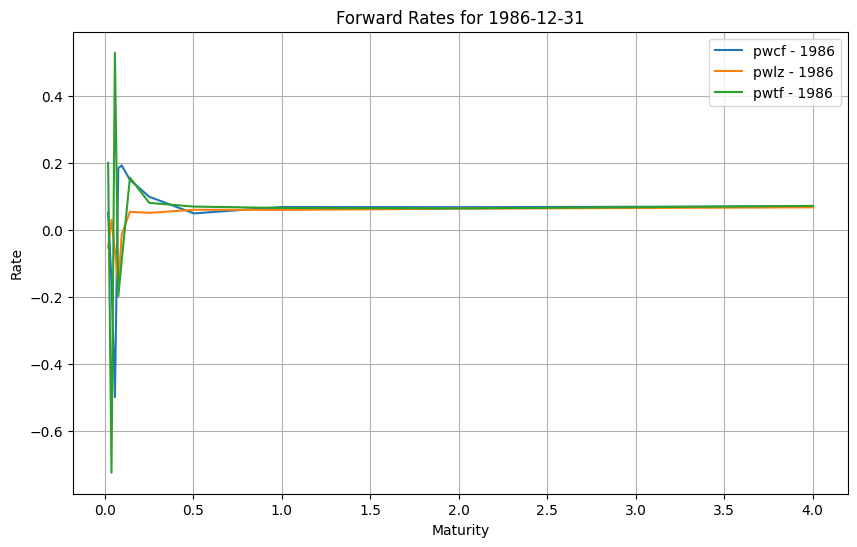

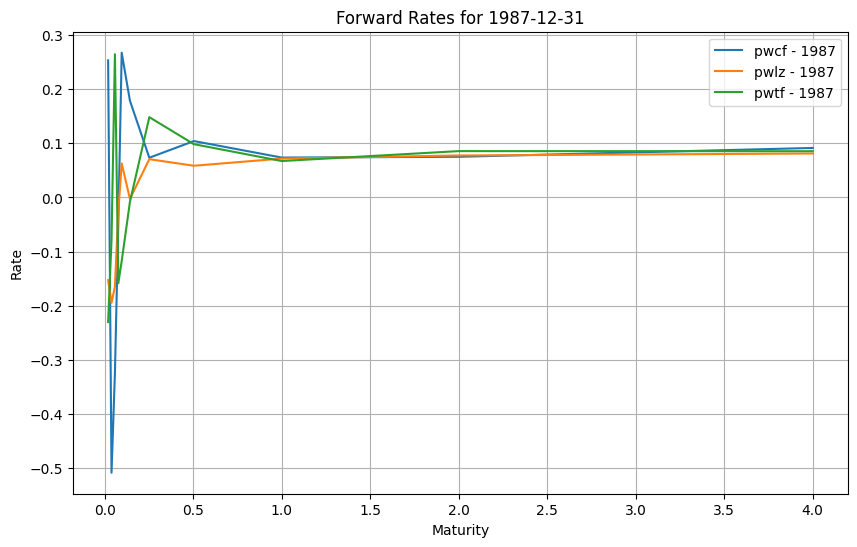

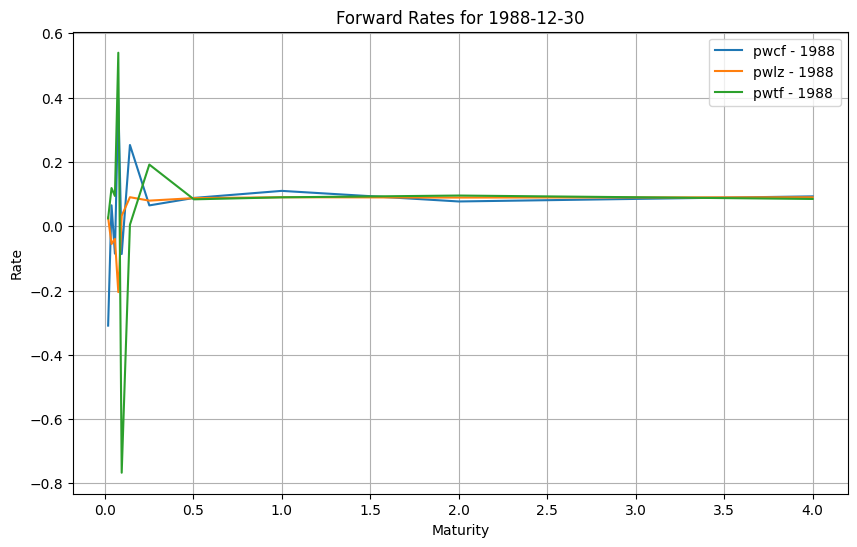

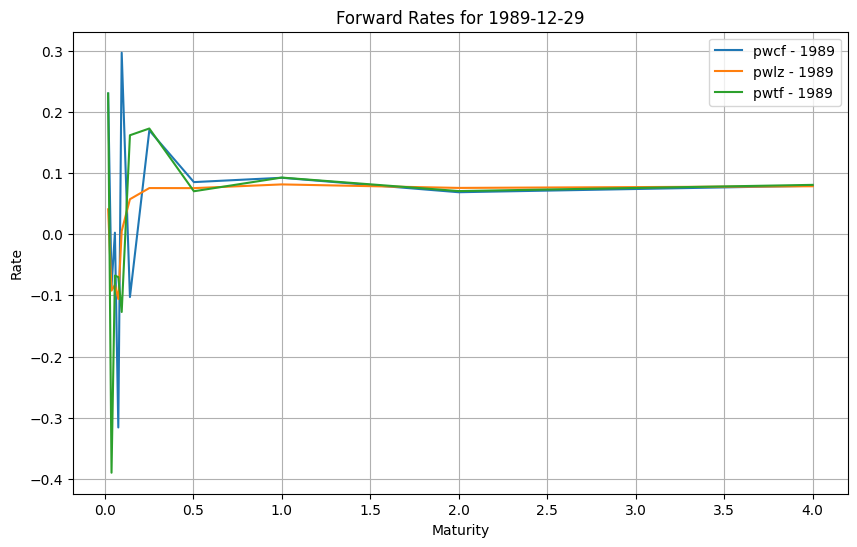

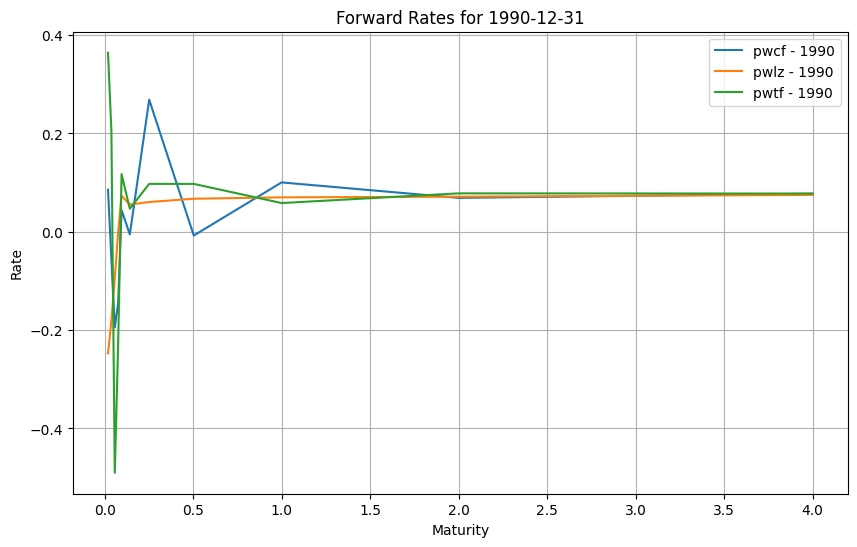

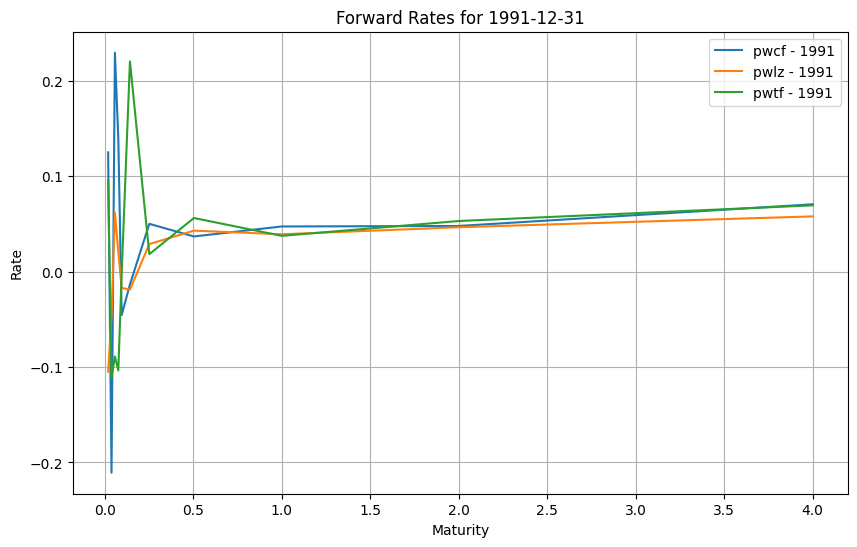

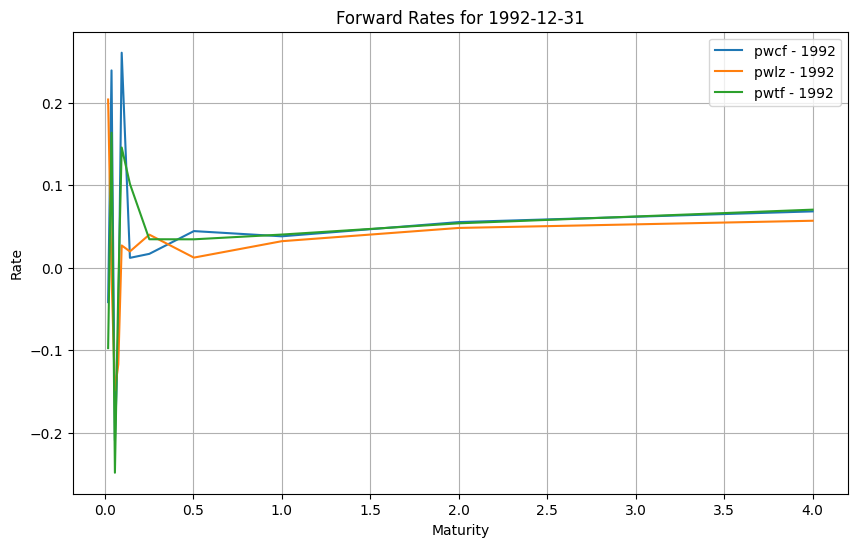

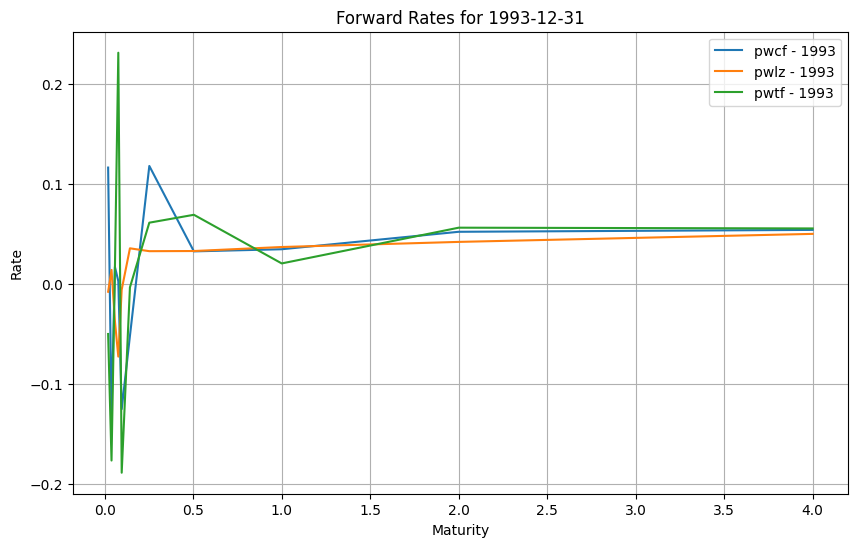

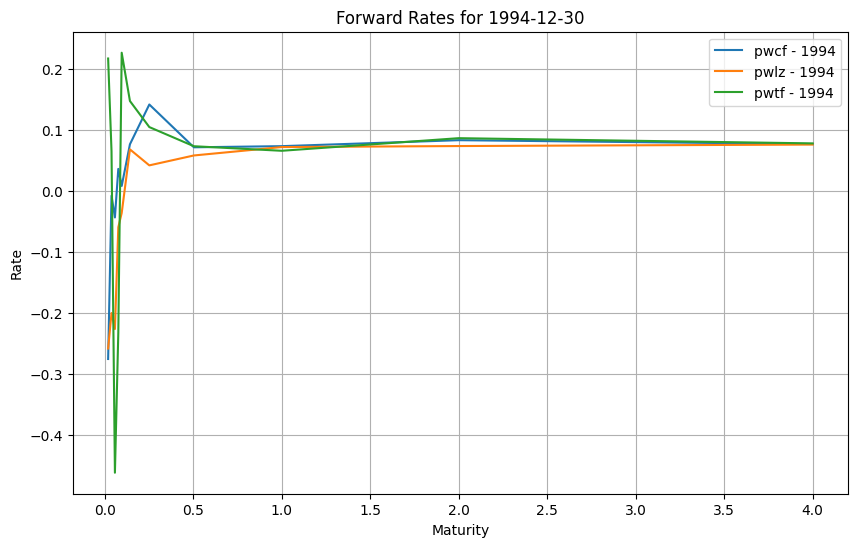

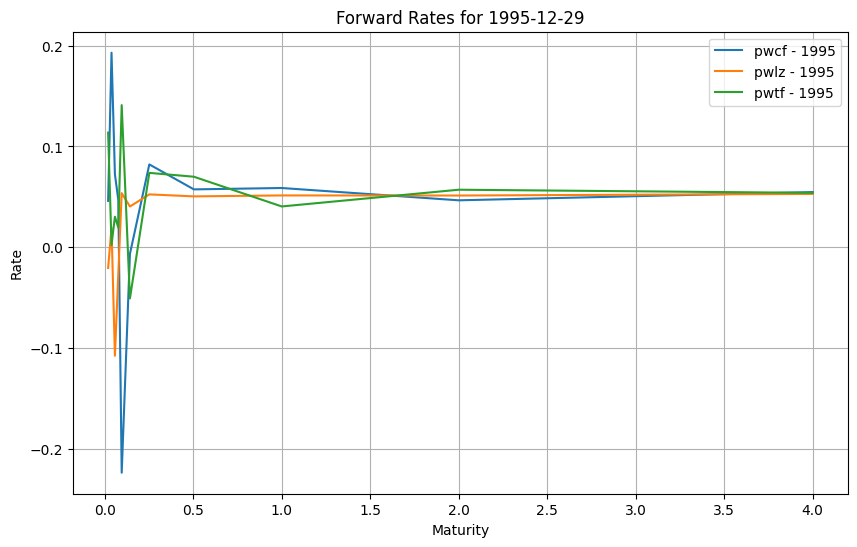

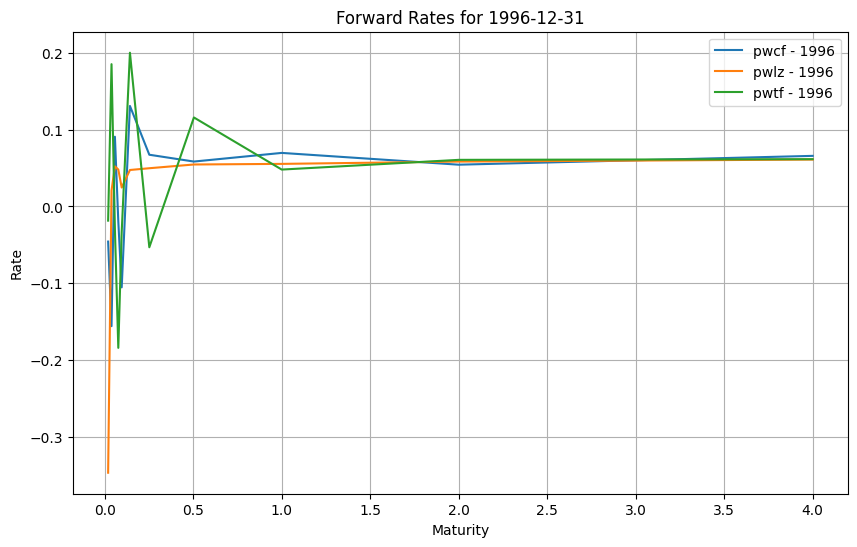

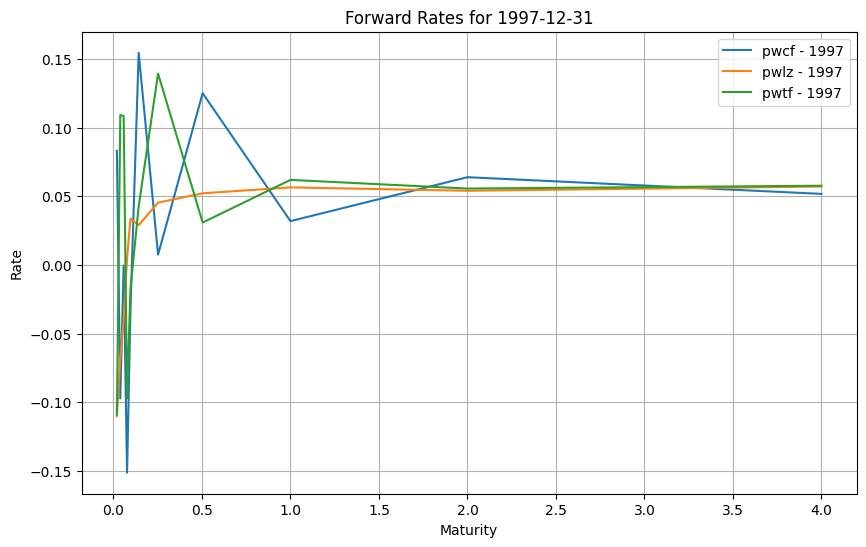

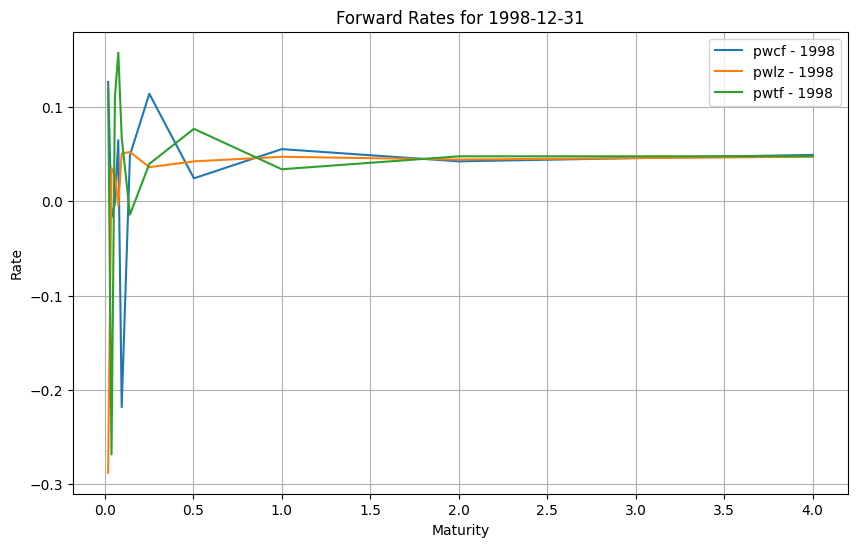

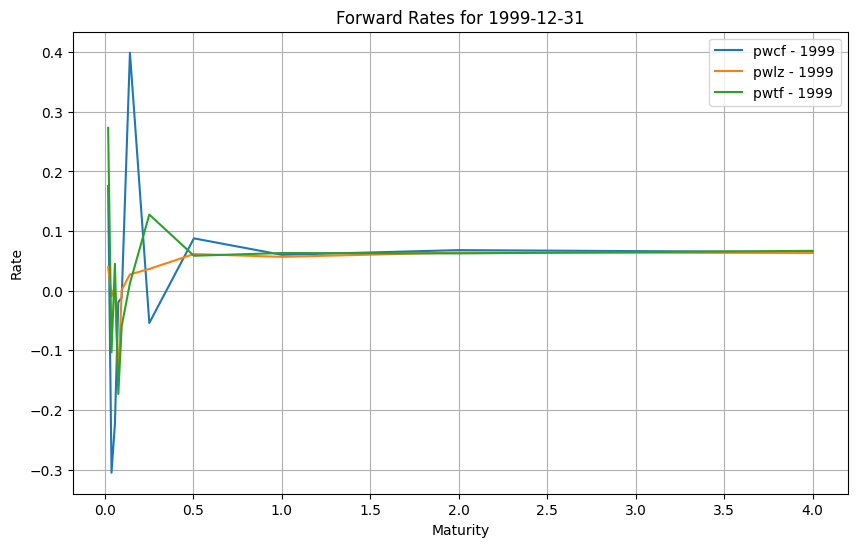

In [48]:
selected_breaks_1 = [7/365.25, 14/365.25, 21/365.25, 28/365.25, 35/365.25, 52/365.25, 92/365.25, 184/365.25, 1, 2, 4]
plot_rates.plot_fwdrate_from(OUTPUT_DIR, '1986to2000', '0-4yrs', '1986to2000', 12, selected_breaks_1, taxflag=False, taxability=1)

Directory '../../output/1986to2000' created


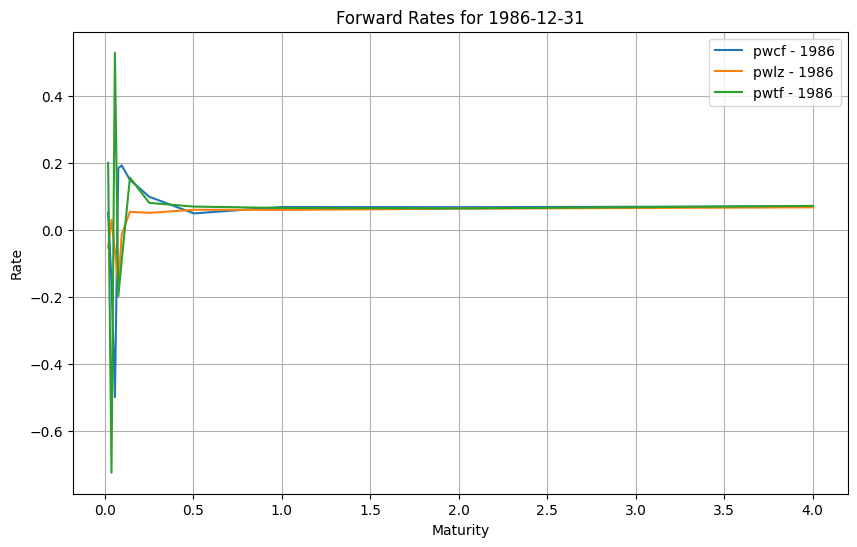

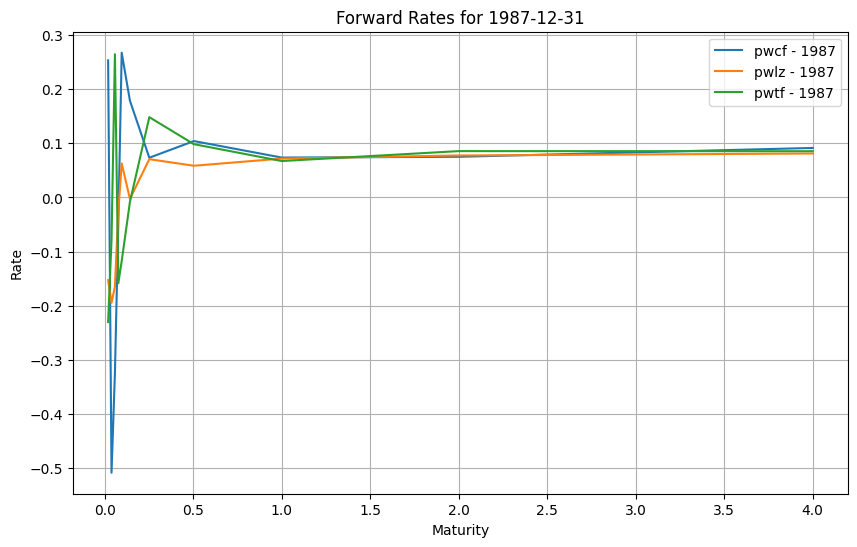

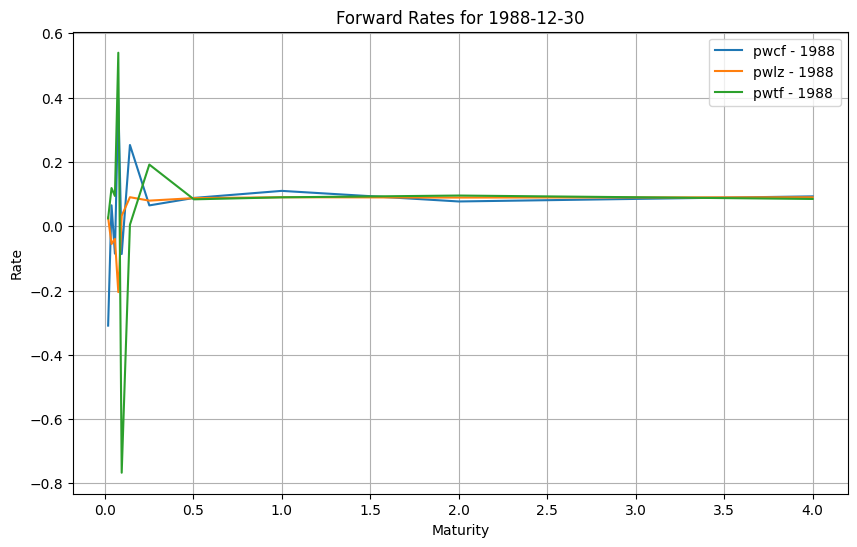

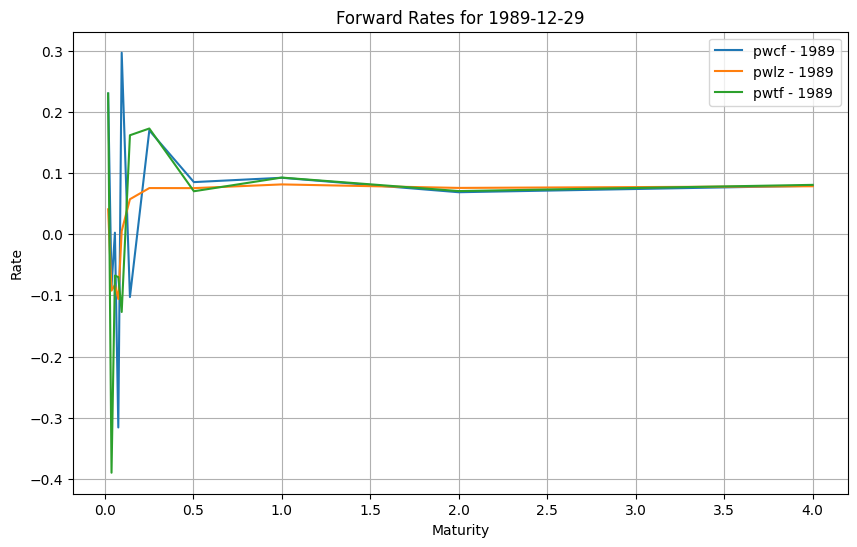

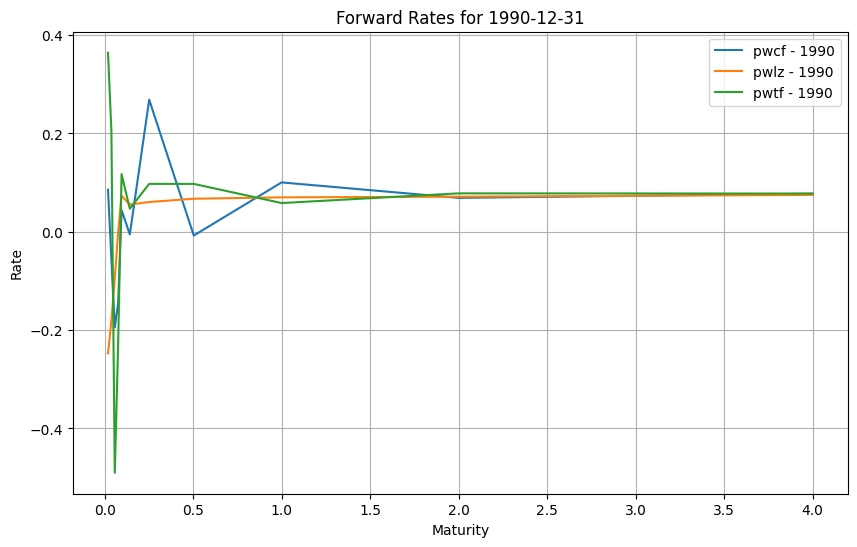

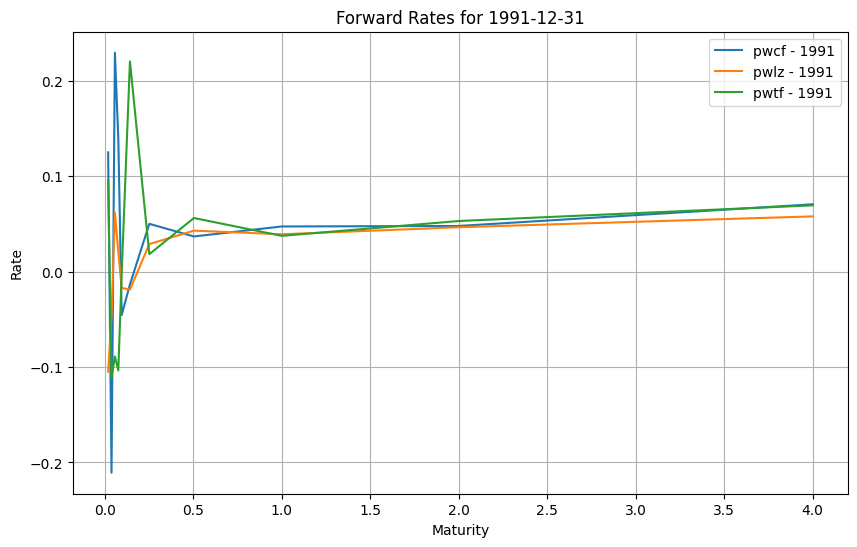

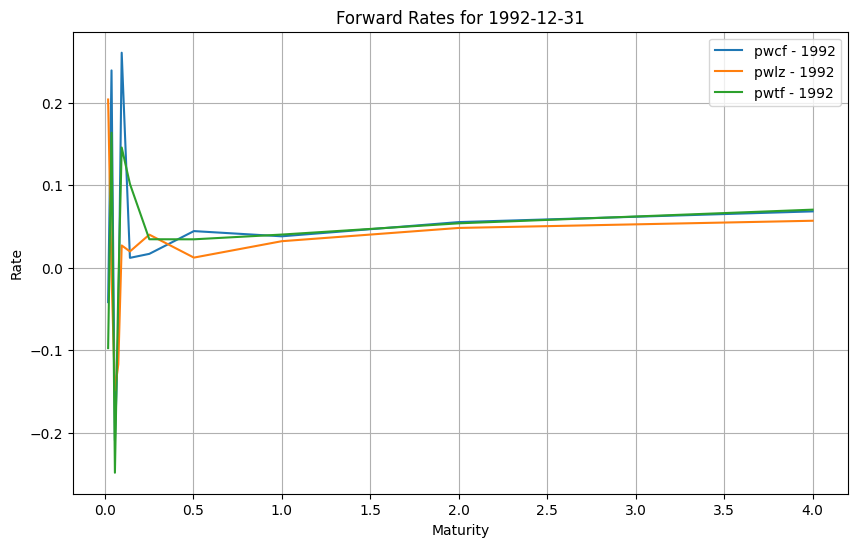

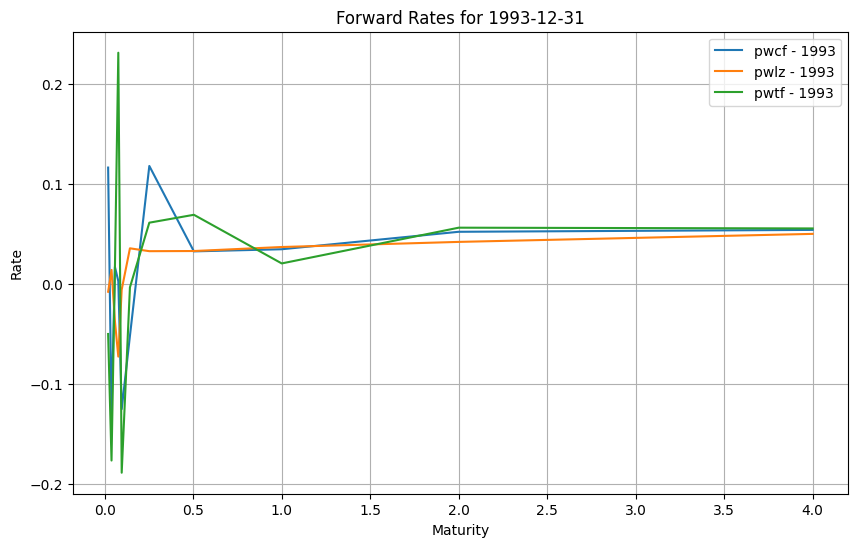

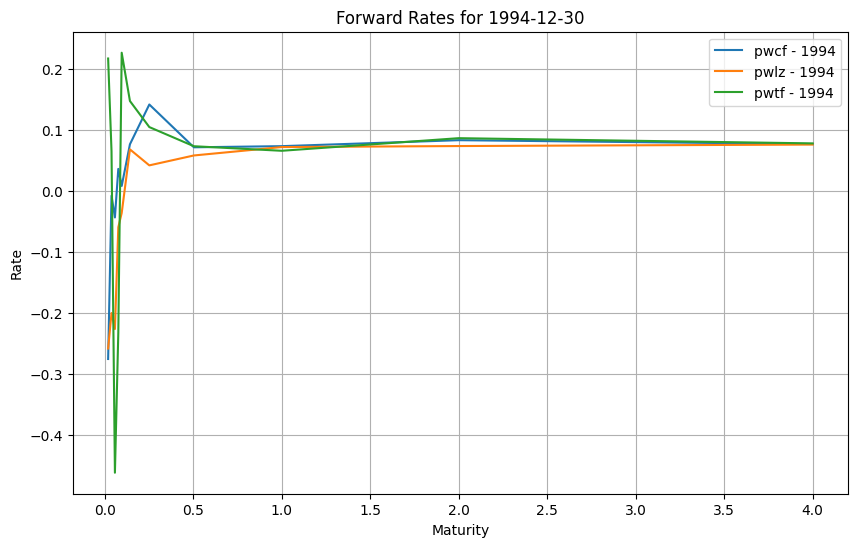

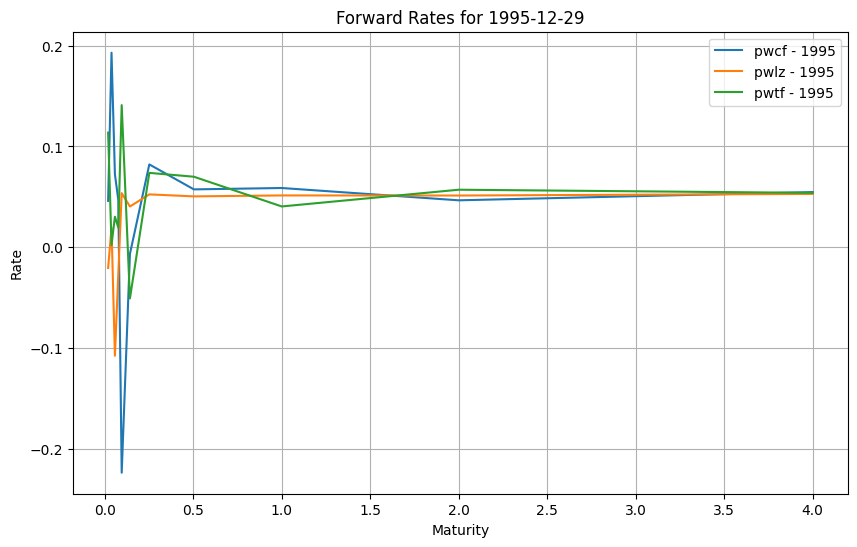

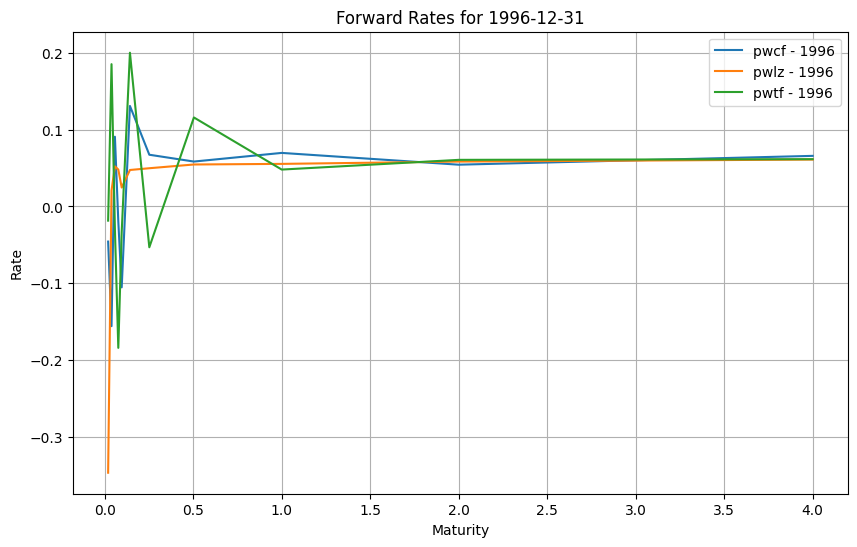

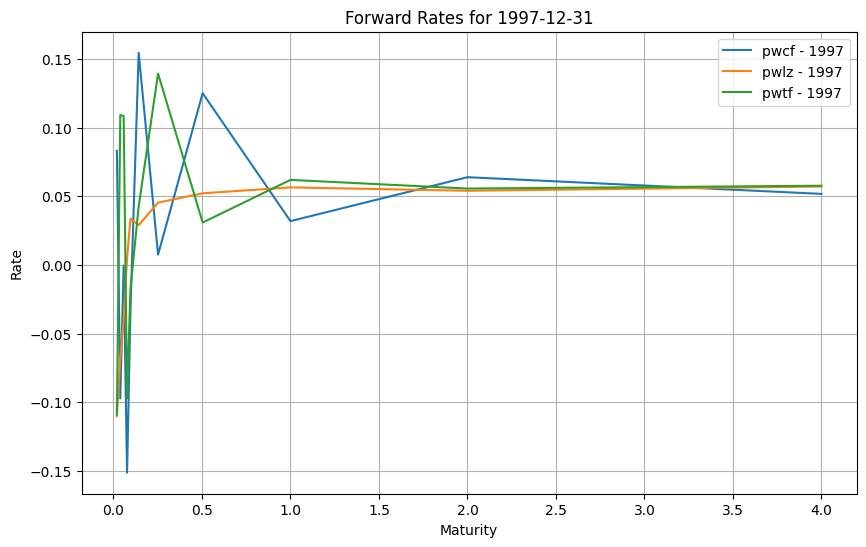

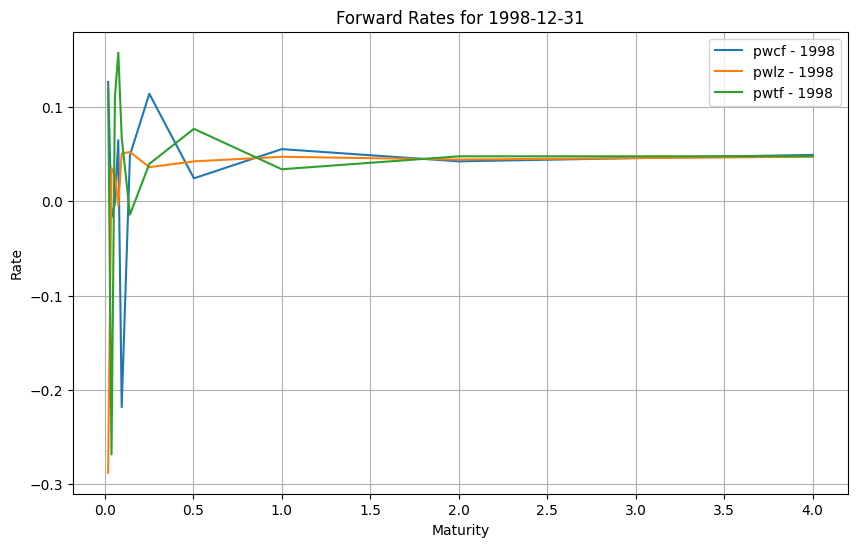

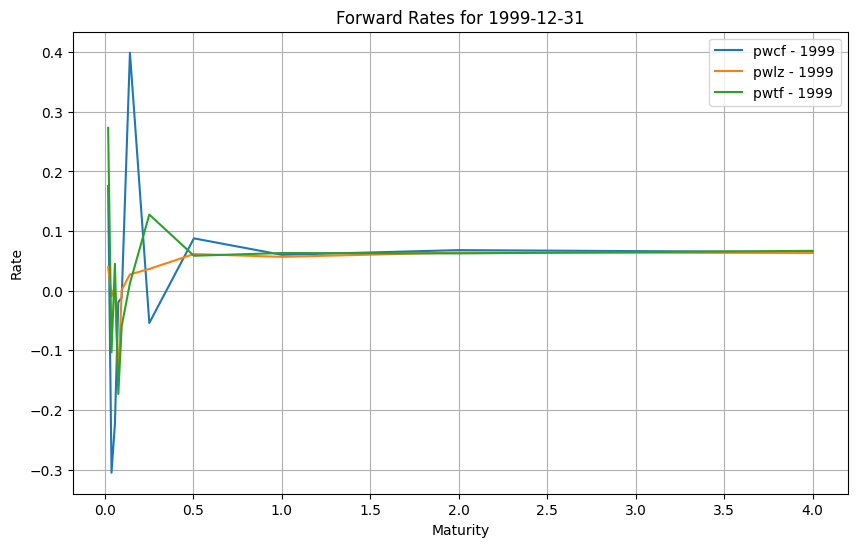

In [49]:
selected_breaks_1 = [7/365.25, 14/365.25, 21/365.25, 28/365.25, 35/365.25, 52/365.25, 92/365.25, 184/365.25, 1, 2, 4]
plot_rates.plot_fwdrate_from(OUTPUT_DIR, '1986to2000', '0-4yrs', '1986to2000', 12, selected_breaks_1, taxflag=False, taxability=1)

In [50]:
plotlatex.create_latex_with_images(OUTPUT_DIR, '1986to2000', '1986to2000.tex')

In [51]:
import plots_to_latex as plotlatex

In [52]:
imp.reload(plotlatex)

<module 'plots_to_latex' from 'c:\\Users\\zhang\\OneDrive\\Documents\\GitHub\\UST-yieldcurves_2024\\curve_utils\\src\\development\\plots_to_latex.py'>

In [53]:
plotlatex.create_latex_with_images(OUTPUT_DIR, '1986to2000', '1986to2000.tex')

Directory '../../output/1986to2000' created


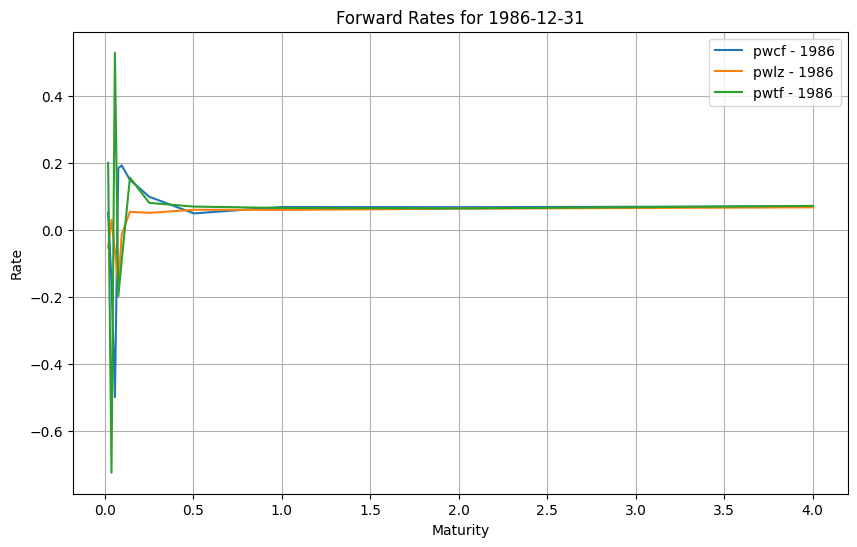

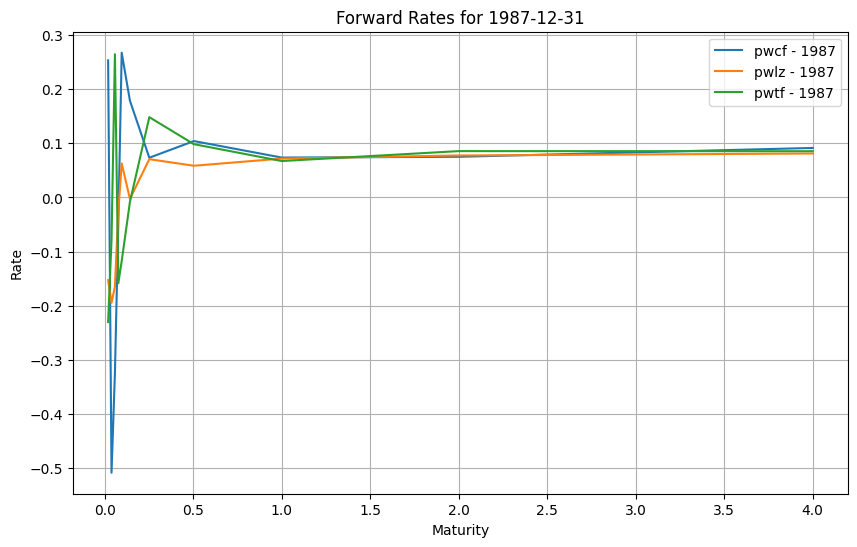

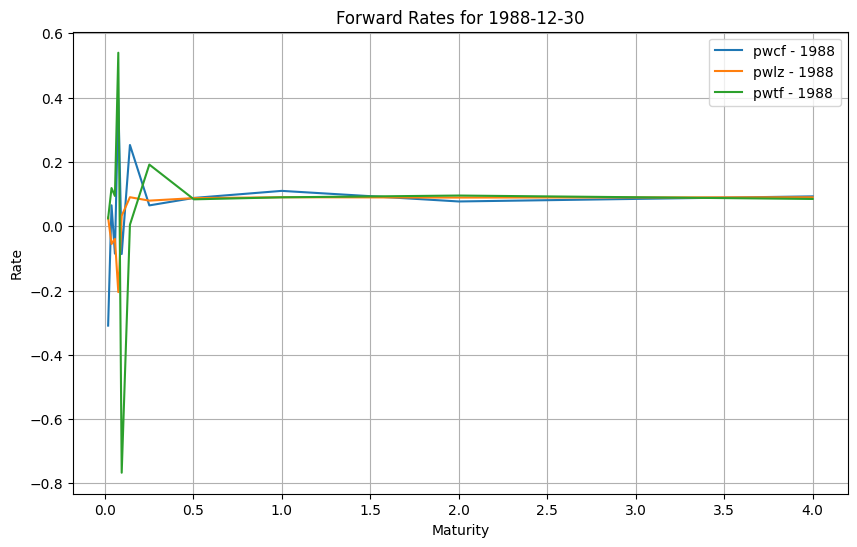

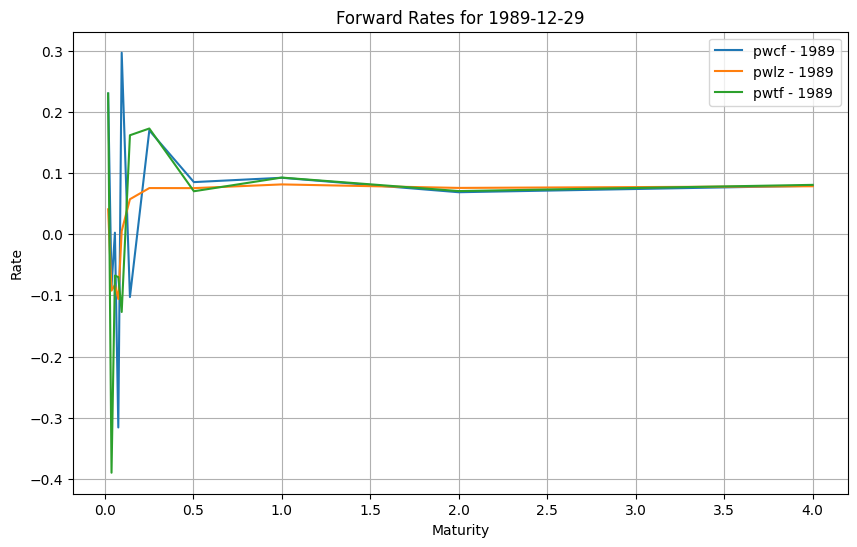

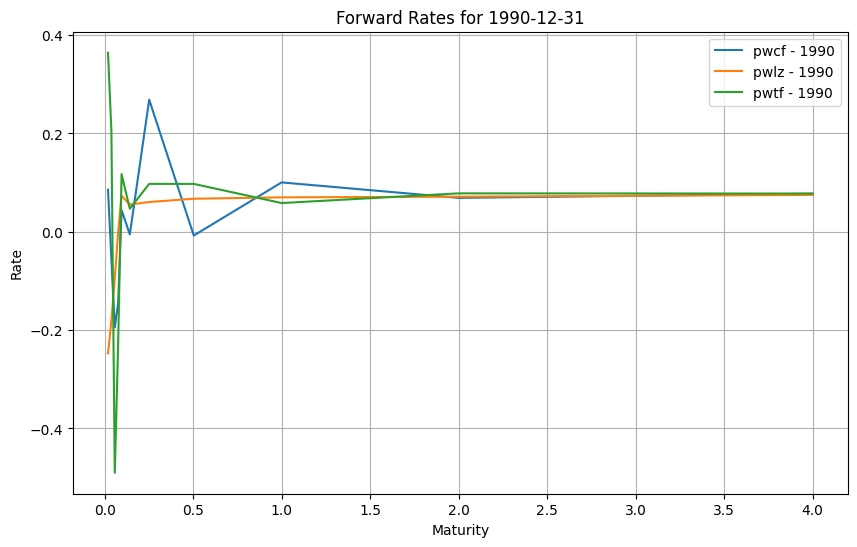

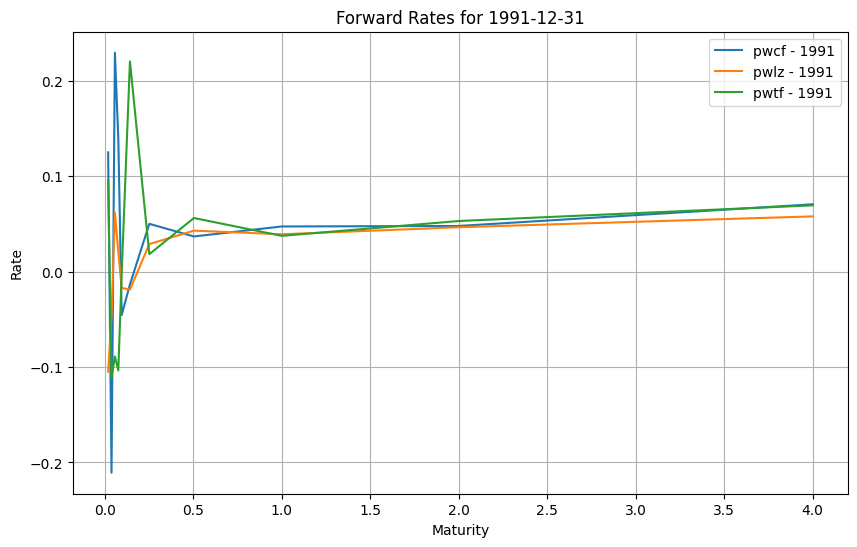

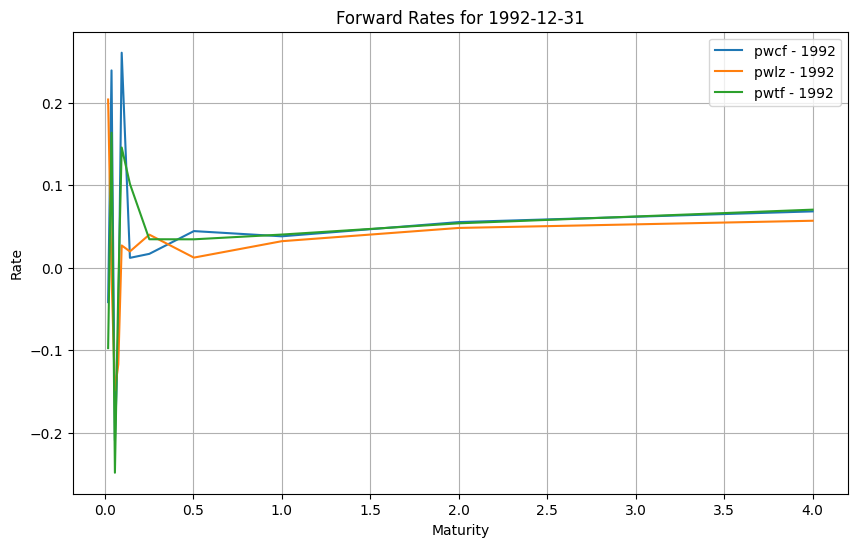

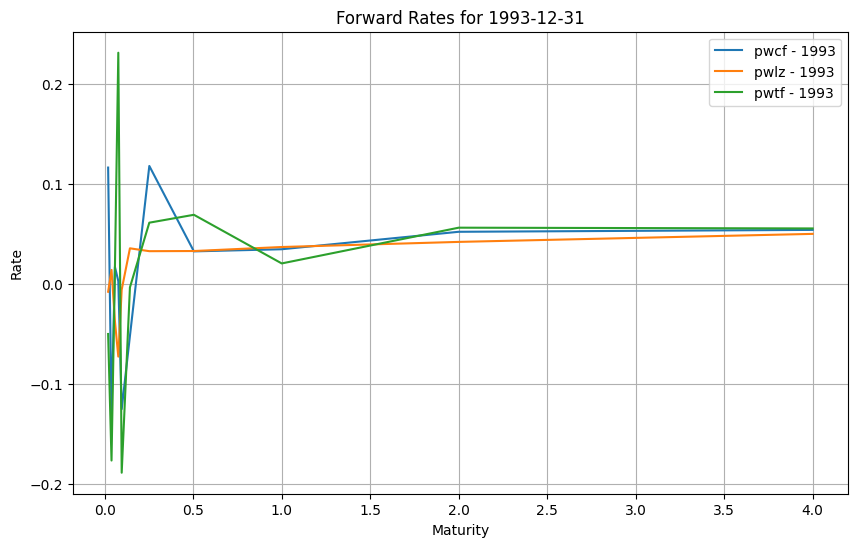

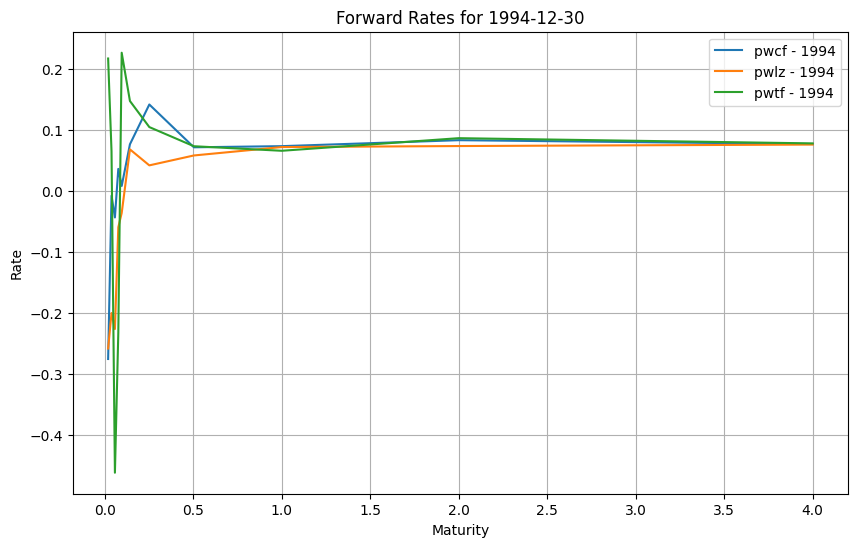

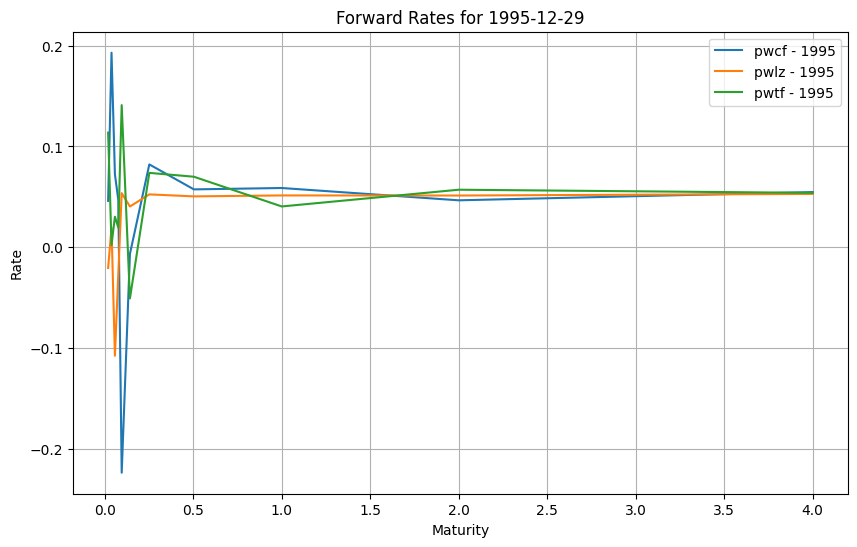

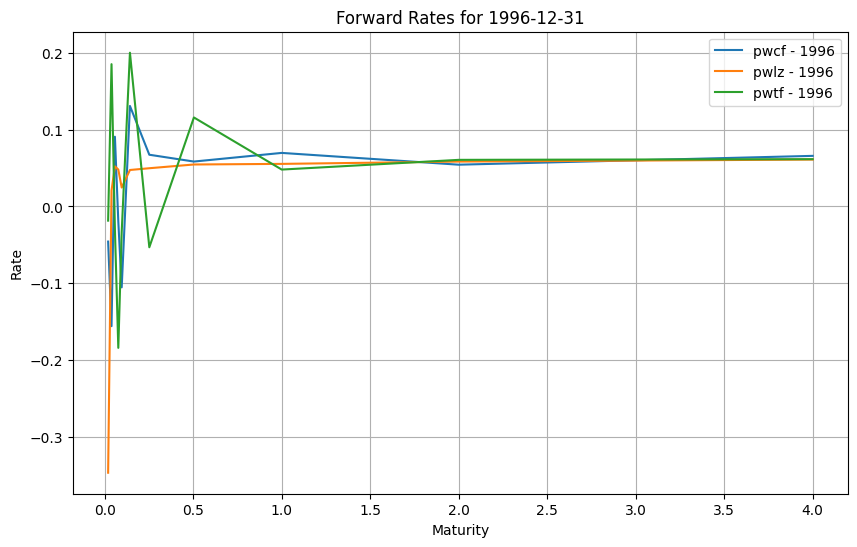

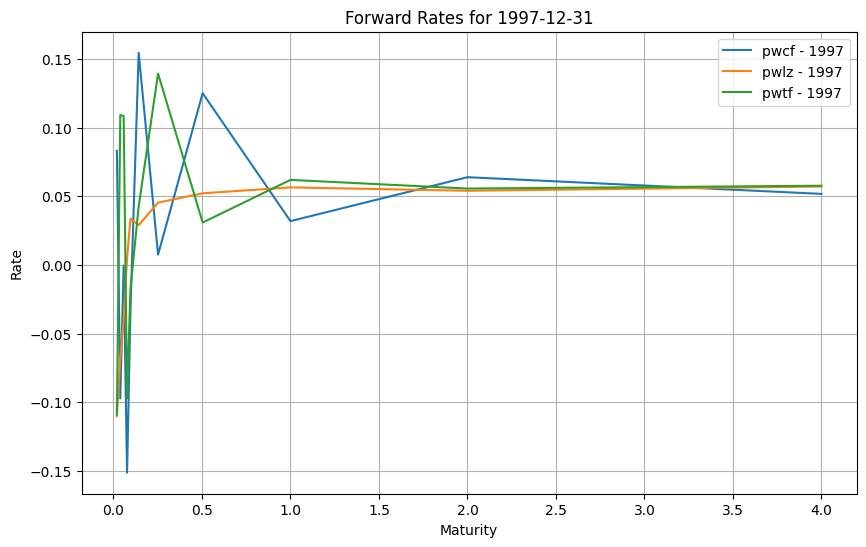

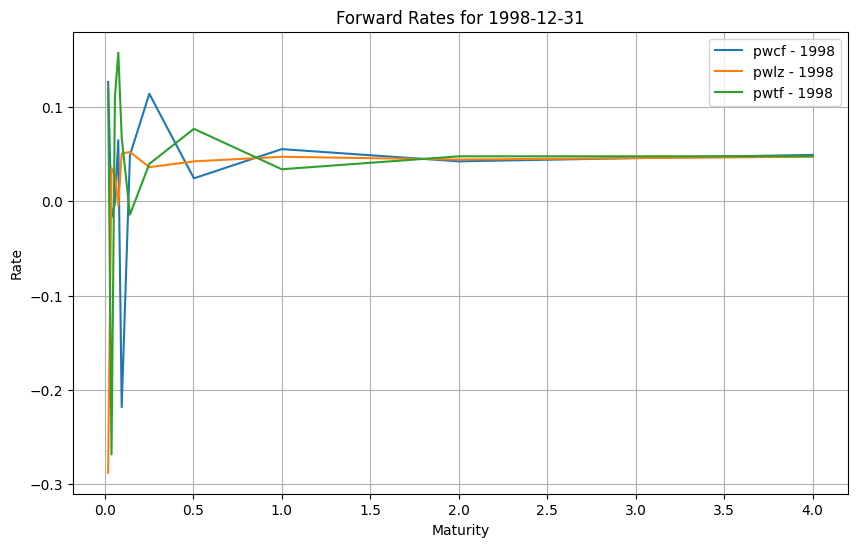

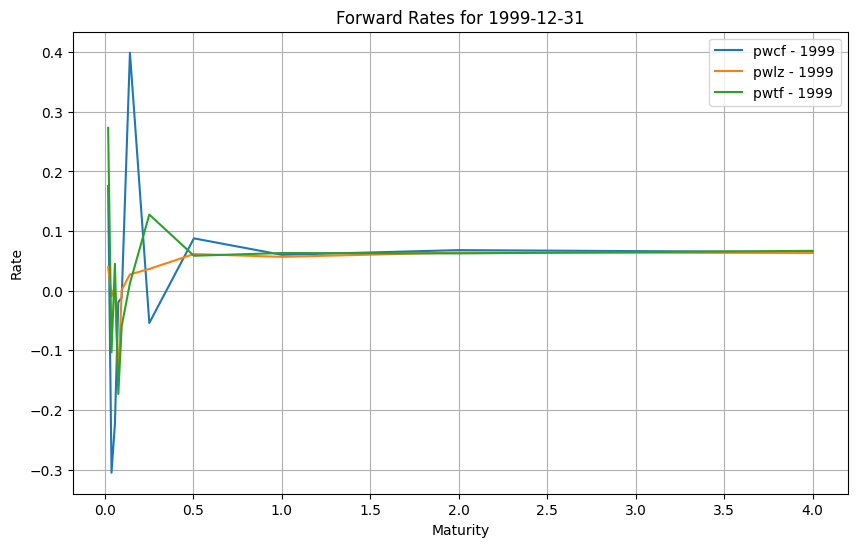

Directory '../../output/1986to2000' created


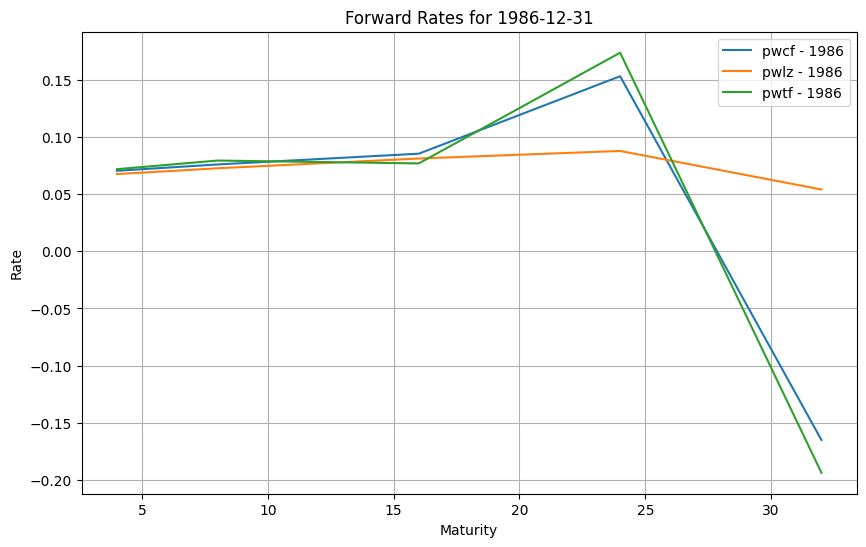

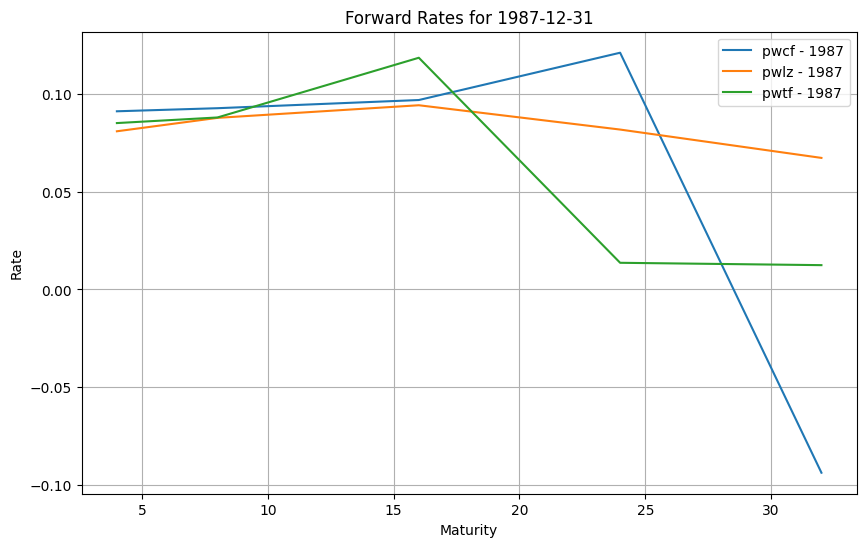

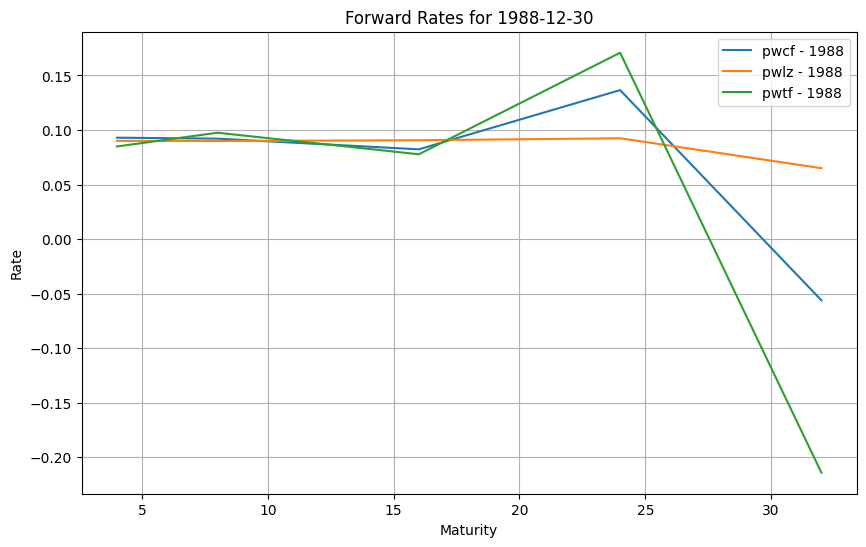

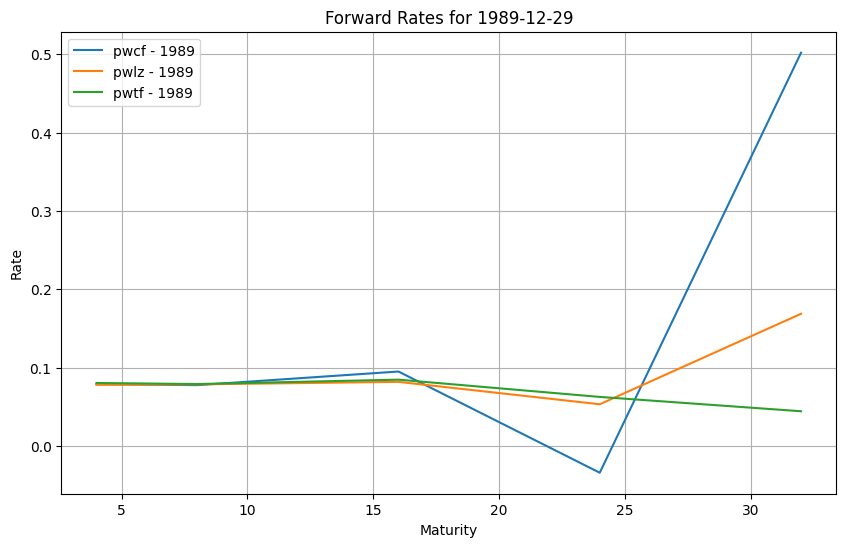

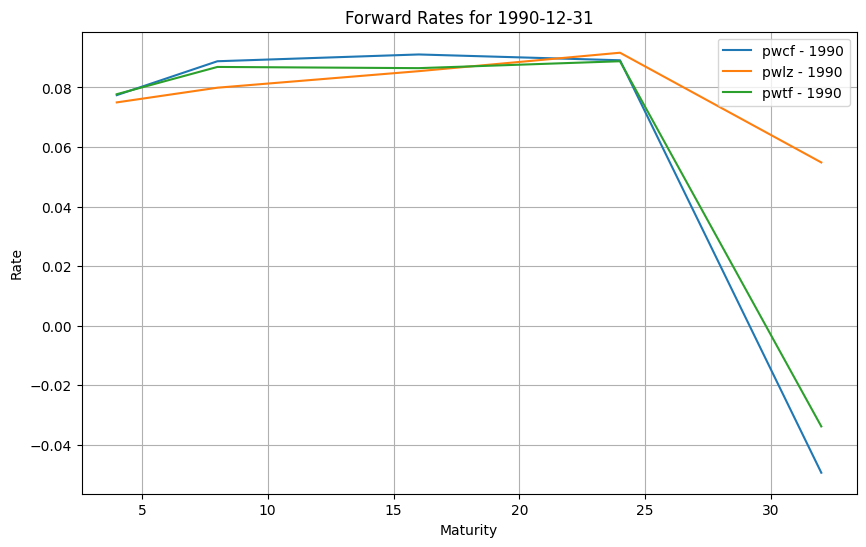

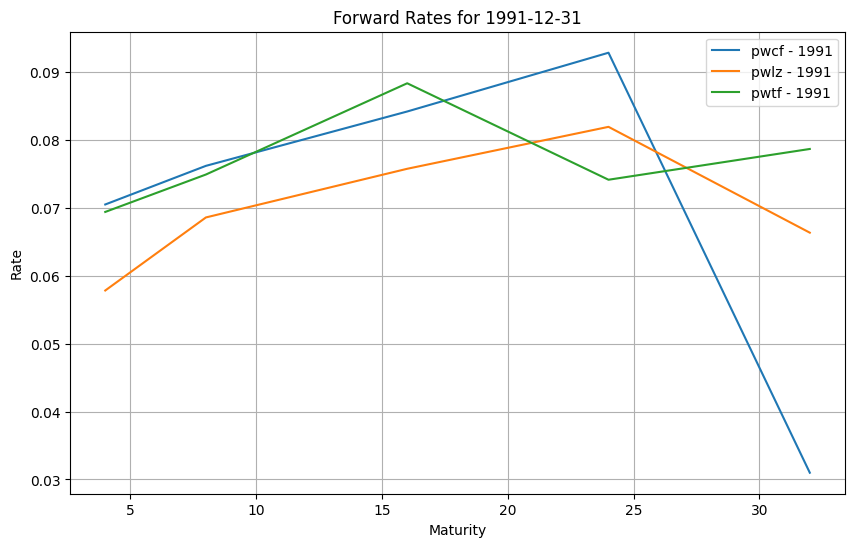

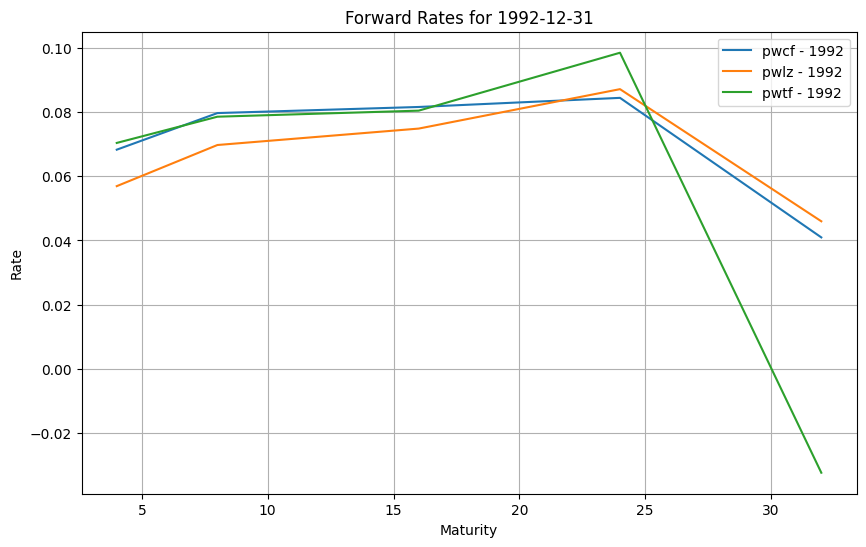

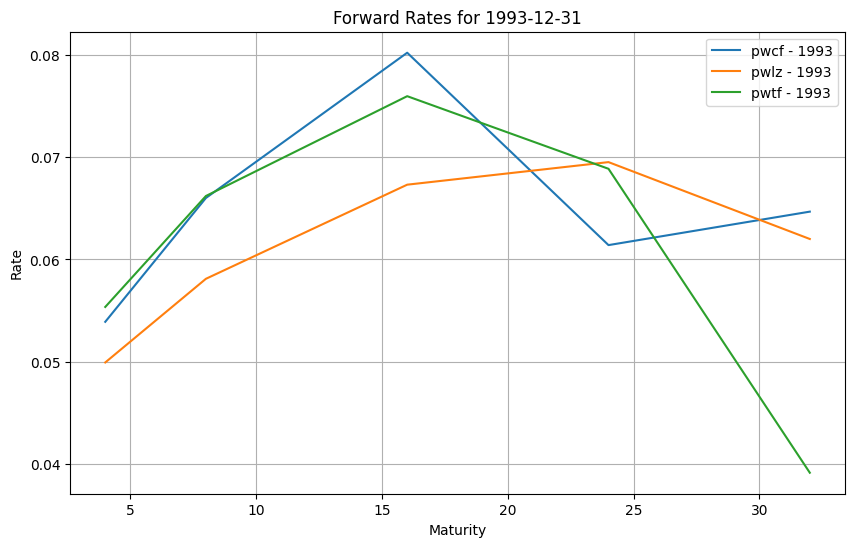

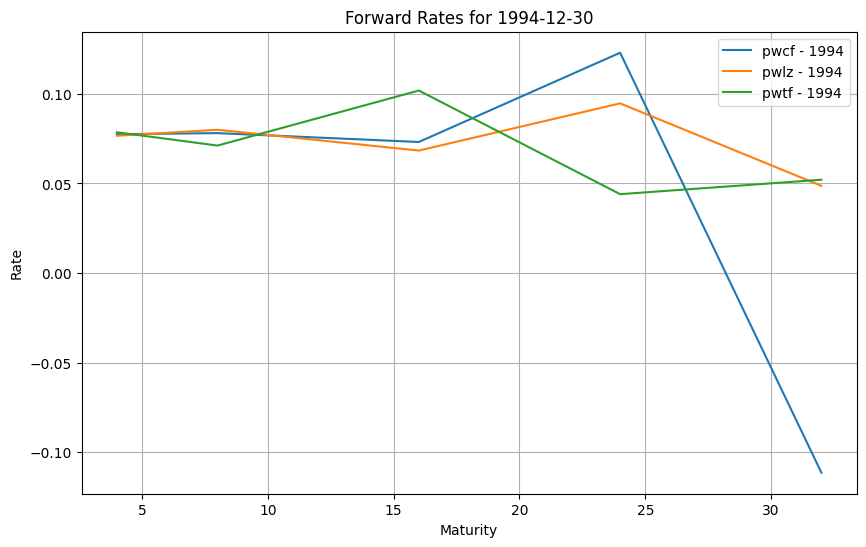

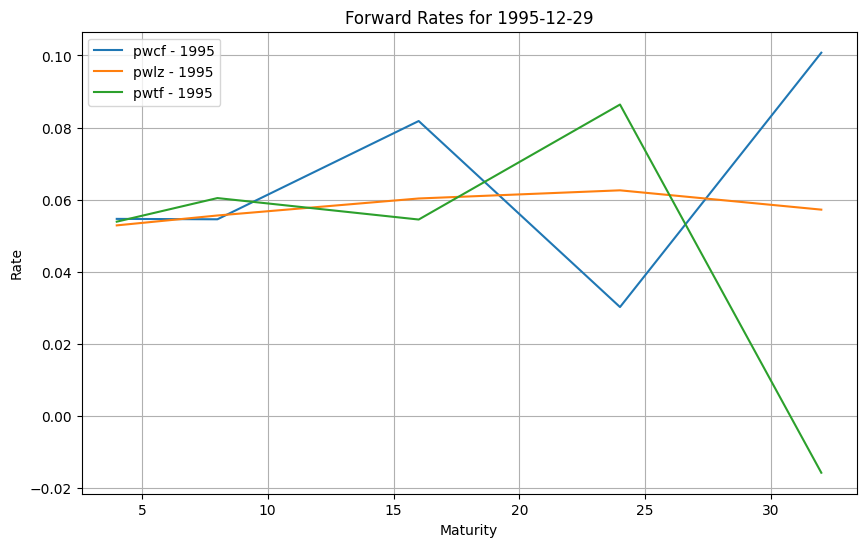

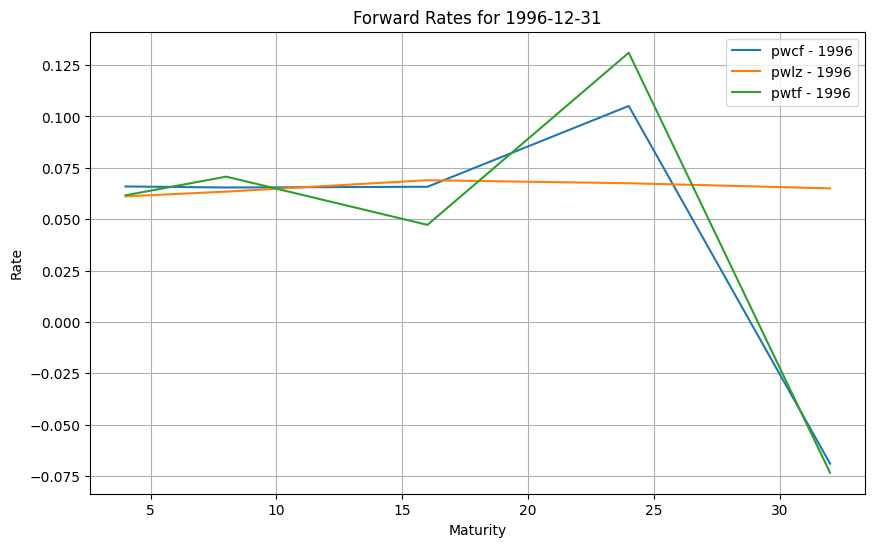

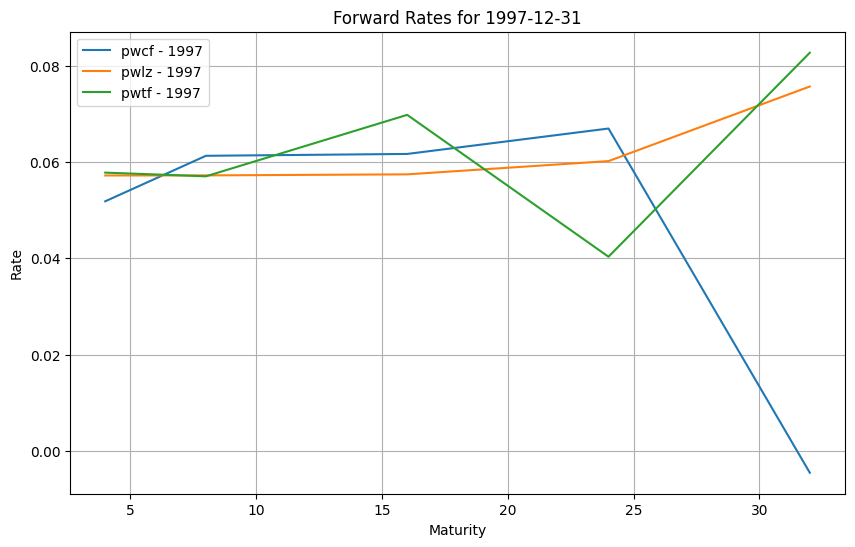

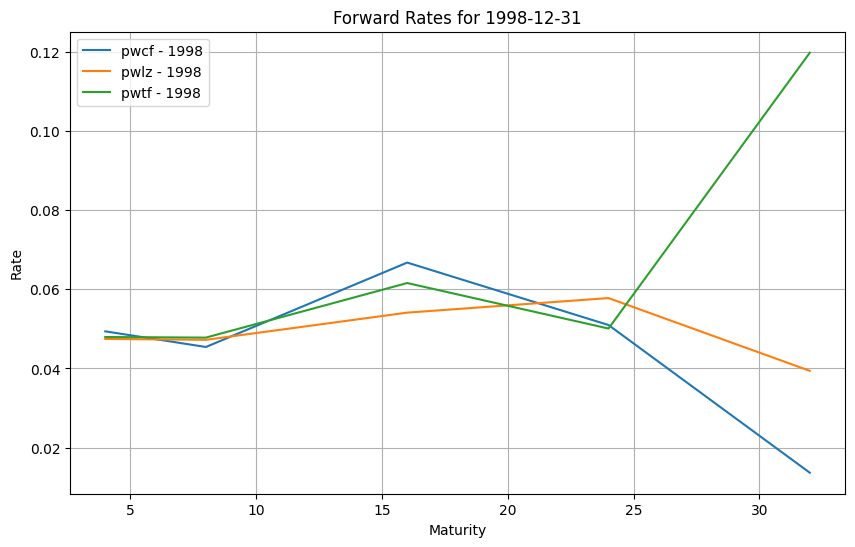

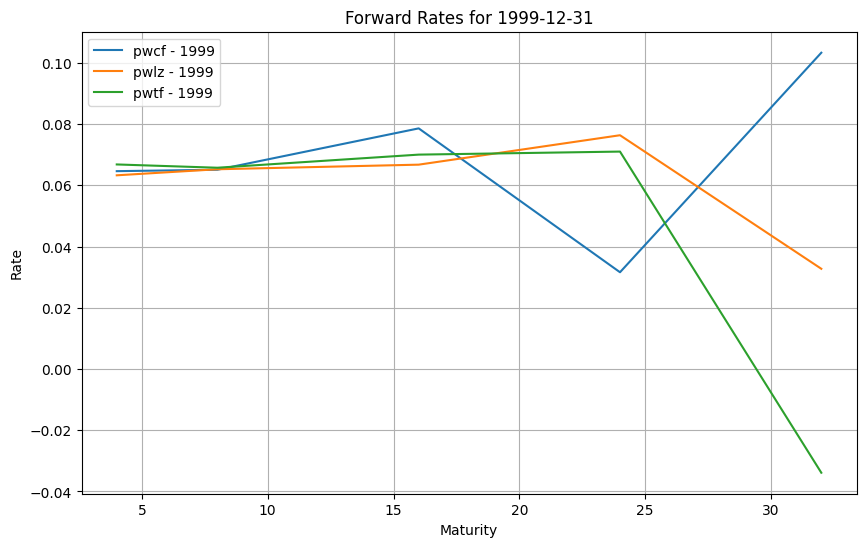

In [54]:
selected_breaks_1 = [7/365.25, 14/365.25, 21/365.25, 28/365.25, 35/365.25, 52/365.25, 92/365.25, 184/365.25, 1, 2, 4]
selected_breaks_2 = [4, 8, 16, 24, 32]
plot_rates.plot_fwdrate_from(OUTPUT_DIR, '1986to2000', '0-4yrs', '1986to2000', 12, selected_breaks_1, taxflag=False, taxability=1)
plot_rates.plot_fwdrate_from(OUTPUT_DIR, '1986to2000', '4-32yrs', '1986to2000', 12, selected_breaks_2, taxflag=False, taxability=1)

In [55]:
plotlatex.create_latex_with_images(OUTPUT_DIR, '1986to2000', '1986to2000.tex')

In [56]:
plotlatex.create_latex_with_images(OUTPUT_DIR, '1986to2000', '1986to2000.tex')

In [57]:
plotlatex.create_latex_with_images(OUTPUT_DIR, '1986to2000', '1986to2000fwdrate.tex')

In [58]:
plotlatex.create_latex_with_images(OUTPUT_DIR, '1986to2000', '1986to2000fwdrate.tex')

No kernel connected

No kernel connected

Connected to Python 3.9.10

In [1]:
import sys

In [2]:
import sys

In [3]:
import sys
import os
import numpy as np
import pandas as pd
import pickle
from openpyxl import Workbook
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
pio.renderers.default='svg'
import datetime
import importlib as imp
import scipy.optimize as so
import scipy.sparse as sp
import time as time
import matplotlib.pyplot as plt
import cProfile

In [4]:
OUTPUT_DIR = '../../output'

In [5]:
sys.path.append('../../src/package')
sys.path.append('../../../BondsTable')
sys.path.append('../../tests')
sys.path.append('../../data')
import DateFunctions_1 as dates
import pvfn as pv
import pvcover as pvc
import discfact as df
import Curve_Plotting as plot
import CRSPBondsAnalysis as analysis
import crsp_data_processing as data_processing
import produce_inputs as inputs
import calculate_ratesprices as outputs
import plot_rates as plot_rates
import util_fn as util
import plots_to_latex as plotlatex
imp.reload(dates)
imp.reload(pv)
imp.reload(pvc)
imp.reload(inputs)
imp.reload(outputs)
imp.reload(plot_rates)
imp.reload(plot)
imp.reload(plotlatex)

ModuleNotFoundError: No module named 'DateFunctions_1'

In [6]:
os.chdir("curve_utils/src/development")

In [7]:
OUTPUT_DIR = '../../output'

In [8]:
sys.path.append('../../src/package')
sys.path.append('../../../BondsTable')
sys.path.append('../../tests')
sys.path.append('../../data')
import DateFunctions_1 as dates
import pvfn as pv
import pvcover as pvc
import discfact as df
import Curve_Plotting as plot
import CRSPBondsAnalysis as analysis
import crsp_data_processing as data_processing
import produce_inputs as inputs
import calculate_ratesprices as outputs
import plot_rates as plot_rates
import util_fn as util
import plots_to_latex as plotlatex
imp.reload(dates)
imp.reload(pv)
imp.reload(pvc)
imp.reload(inputs)
imp.reload(outputs)
imp.reload(plot_rates)
imp.reload(plot)
imp.reload(plotlatex)

ModuleNotFoundError: No module named 'DateFunctions_1'

In [9]:
sys.path

['c:\\Users\\zhang\\OneDrive\\Documents\\GitHub\\UST-yieldcurves_2024',
 'c:\\Program Files\\Python39\\python39.zip',
 'c:\\Program Files\\Python39\\DLLs',
 'c:\\Program Files\\Python39\\lib',
 'c:\\Program Files\\Python39',
 '',
 'C:\\Users\\zhang\\AppData\\Roaming\\Python\\Python39\\site-packages',
 'C:\\Users\\zhang\\AppData\\Roaming\\Python\\Python39\\site-packages\\win32',
 'C:\\Users\\zhang\\AppData\\Roaming\\Python\\Python39\\site-packages\\win32\\lib',
 'C:\\Users\\zhang\\AppData\\Roaming\\Python\\Python39\\site-packages\\Pythonwin',
 'c:\\Program Files\\Python39\\lib\\site-packages',
 '../../src/package',
 '../../../BondsTable',
 '../../tests',
 '../../data',
 '../../src/package',
 '../../../BondsTable',
 '../../tests',
 '../../data']

In [10]:
sys.path.pop()

'../../data'

In [11]:
os.chdir("curve_utils/src/development")

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'curve_utils/src/development'

In [12]:
os.chdir("C:/Users/zhang/OneDrive/Documents/GitHub/UST-yieldcurves_2024curve_utils/src/development")

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:/Users/zhang/OneDrive/Documents/GitHub/UST-yieldcurves_2024curve_utils/src/development'

In [13]:
os.chdir("C:/Users/zhang/OneDrive/Documents/GitHub/UST-yieldcurves_2024/curve_utils/src/development")

In [14]:
OUTPUT_DIR = '../../output'

In [15]:
sys.path.append('../../src/package')
sys.path.append('../../../BondsTable')
sys.path.append('../../tests')
sys.path.append('../../data')
import DateFunctions_1 as dates
import pvfn as pv
import pvcover as pvc
import discfact as df
import Curve_Plotting as plot
import CRSPBondsAnalysis as analysis
import crsp_data_processing as data_processing
import produce_inputs as inputs
import calculate_ratesprices as outputs
import plot_rates as plot_rates
import util_fn as util
import plots_to_latex as plotlatex
imp.reload(dates)
imp.reload(pv)
imp.reload(pvc)
imp.reload(inputs)
imp.reload(outputs)
imp.reload(plot_rates)
imp.reload(plot)
imp.reload(plotlatex)

ModuleNotFoundError: No module named 'DateFunctions_1'

In [16]:
sys.path.append('../../src/package')

In [17]:
sys.path.append('../../../BondsTable')

In [18]:
sys.path.append('../../tests')

In [19]:
sys.path.append('../../data')

In [20]:
import DateFunctions_1 as dates

ModuleNotFoundError: No module named 'DateFunctions_1'

In [21]:
import pvfn as pv

ModuleNotFoundError: No module named 'pvfn'

In [22]:
print(sys.path)

['c:\\Users\\zhang\\OneDrive\\Documents\\GitHub\\UST-yieldcurves_2024', 'c:\\Program Files\\Python39\\python39.zip', 'c:\\Program Files\\Python39\\DLLs', 'c:\\Program Files\\Python39\\lib', 'c:\\Program Files\\Python39', '', 'C:\\Users\\zhang\\AppData\\Roaming\\Python\\Python39\\site-packages', 'C:\\Users\\zhang\\AppData\\Roaming\\Python\\Python39\\site-packages\\win32', 'C:\\Users\\zhang\\AppData\\Roaming\\Python\\Python39\\site-packages\\win32\\lib', 'C:\\Users\\zhang\\AppData\\Roaming\\Python\\Python39\\site-packages\\Pythonwin', 'c:\\Program Files\\Python39\\lib\\site-packages', '../../src/package', '../../../BondsTable', '../../tests', '../../data', '../../src/package', '../../../BondsTable', '../../tests', '../../src/package', '../../../BondsTable', '../../tests', '../../data', '../../src/package', '../../../BondsTable', '../../tests', '../../data']


In [23]:
sys.path.pop()

'../../data'

In [24]:
sys.path.pop()

'../../tests'

In [25]:
sys.path.pop()

'../../../BondsTable'

In [26]:
sys.path.pop()

'../../src/package'

In [27]:
sys.path.pop()

'../../data'

In [28]:
sys.path.pop()

'../../tests'

In [29]:
sys.path.pop()

'../../../BondsTable'

In [30]:
sys.path.pop()

'../../src/package'

In [31]:
sys.path.pop()

'../../tests'

In [32]:
sys.path.pop()

'../../../BondsTable'

In [33]:
sys.path.pop()

'../../src/package'

In [34]:
sys.path.pop()

'../../data'

In [35]:
sys.path.pop()

'../../tests'

In [36]:
sys.path.pop()

'../../../BondsTable'

In [37]:
sys.path.pop()

'../../src/package'

In [38]:
sys.path.pop()

'c:\\Program Files\\Python39\\lib\\site-packages'

In [39]:
sys.path.pop()

'C:\\Users\\zhang\\AppData\\Roaming\\Python\\Python39\\site-packages\\Pythonwin'

In [40]:
sys.path.pop()

'C:\\Users\\zhang\\AppData\\Roaming\\Python\\Python39\\site-packages\\win32\\lib'

In [41]:
sys.path.pop()

'C:\\Users\\zhang\\AppData\\Roaming\\Python\\Python39\\site-packages\\win32'

In [42]:
sys.path

['c:\\Users\\zhang\\OneDrive\\Documents\\GitHub\\UST-yieldcurves_2024',
 'c:\\Program Files\\Python39\\python39.zip',
 'c:\\Program Files\\Python39\\DLLs',
 'c:\\Program Files\\Python39\\lib',
 'c:\\Program Files\\Python39',
 '',
 'C:\\Users\\zhang\\AppData\\Roaming\\Python\\Python39\\site-packages']

In [43]:
sys.path.append('c:\\Program Files\\Python39\\lib\\site-packages')

In [44]:
sys.path.append('C:\\Users\\zhang\\AppData\\Roaming\\Python\\Python39\\site-packages\\Pythonwin')

In [45]:
sys.path.append('C:\\Users\\zhang\\AppData\\Roaming\\Python\\Python39\\site-packages\\win32\\lib')

In [46]:
sys.path.append('C:\\Users\\zhang\\AppData\\Roaming\\Python\\Python39\\site-packages\\win32')

In [47]:
sys.path

['c:\\Users\\zhang\\OneDrive\\Documents\\GitHub\\UST-yieldcurves_2024',
 'c:\\Program Files\\Python39\\python39.zip',
 'c:\\Program Files\\Python39\\DLLs',
 'c:\\Program Files\\Python39\\lib',
 'c:\\Program Files\\Python39',
 '',
 'C:\\Users\\zhang\\AppData\\Roaming\\Python\\Python39\\site-packages',
 'c:\\Program Files\\Python39\\lib\\site-packages',
 'C:\\Users\\zhang\\AppData\\Roaming\\Python\\Python39\\site-packages\\Pythonwin',
 'C:\\Users\\zhang\\AppData\\Roaming\\Python\\Python39\\site-packages\\win32\\lib',
 'C:\\Users\\zhang\\AppData\\Roaming\\Python\\Python39\\site-packages\\win32']

In [48]:
os.chdir("C:/Users/zhang/OneDrive/Documents/GitHub/UST-yieldcurves_2024/curve_utils/src/development")

In [49]:
os.getcwd

<function nt.getcwd()>

In [50]:
os.getcwd()

'C:\\Users\\zhang\\OneDrive\\Documents\\GitHub\\UST-yieldcurves_2024\\curve_utils\\src\\development'

In [51]:
sys.path.append('../../src/package')

In [52]:
import DateFunctions_1 as dates

ModuleNotFoundError: No module named 'DateFunctions_1'

In [53]:
sys.path.append('C:\Users\zhang\OneDrive\Documents\GitHub\UST-yieldcurves_2024\curve_utils\src\package')
sys.path.append('C:\Users\zhang\OneDrive\Documents\GitHub\UST-yieldcurves_2024\BondsTable')
sys.path.append('C:\Users\zhang\OneDrive\Documents\GitHub\UST-yieldcurves_2024\curve_utils\tests')
sys.path.append('C:\Users\zhang\OneDrive\Documents\GitHub\UST-yieldcurves_2024\curve_utils\data')

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-53-0b57198f02b3>, line 1)

In [54]:
sys.path.append('C:/Users/zhang/OneDrive/Documents/GitHub/UST-yieldcurves_2024/curve_utils/src/package')

In [55]:
import DateFunctions_1 as dates

In [56]:
sys.path.append('C:/Users/zhang/OneDrive/Documents/GitHub/UST-yieldcurves_2024/curve_utils/src/package')
sys.path.append('C:/Users\zhang/OneDrive/Documents/GitHub/UST-yieldcurves_2024/BondsTable')
sys.path.append('C:/Users/zhang/OneDrive/Documents/GitHub/UST-yieldcurves_2024/curve_utils/tests')
sys.path.append('C:/Users/zhang/OneDrive/Documents/GitHub/UST-yieldcurves_2024/curve_utils/data')

In [57]:
sys.path.append('C:/Users/zhang/OneDrive/Documents/GitHub/UST-yieldcurves_2024/curve_utils/src/package')
sys.path.append('C:/Users/zhang/OneDrive/Documents/GitHub/UST-yieldcurves_2024/BondsTable')
sys.path.append('C:/Users/zhang/OneDrive/Documents/GitHub/UST-yieldcurves_2024/curve_utils/tests')
sys.path.append('C:/Users/zhang/OneDrive/Documents/GitHub/UST-yieldcurves_2024/curve_utils/data')

In [58]:
import DateFunctions_1 as dates
import pvfn as pv
import pvcover as pvc
import discfact as df
import Curve_Plotting as plot
import CRSPBondsAnalysis as analysis
import crsp_data_processing as data_processing
import produce_inputs as inputs
import calculate_ratesprices as outputs
import plot_rates as plot_rates
import util_fn as util
import plots_to_latex as plotlatex
imp.reload(dates)
imp.reload(pv)
imp.reload(pvc)
imp.reload(inputs)
imp.reload(outputs)
imp.reload(plot_rates)
imp.reload(plot)
imp.reload(plotlatex)

C:\Users\zhang\OneDrive\Documents\GitHub\UST-yieldcurves_2024\curve_utils\src\development\crsp_data_processing.py:46: DtypeWarning:

Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\zhang\OneDrive\Documents\GitHub\UST-yieldcurves_2024\curve_utils\src\development\crsp_data_processing.py:241: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\zhang\OneDrive\Documents\GitHub\UST-yieldcurves_2024\curve_utils\src\development\crsp_data_processing.py:244: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

<module 'plots_to_latex' from 'C:\\Users\\zhang\\OneDrive\\Documents\\GitHub\\UST-yieldcurves_2024\\curve_utils\\src\\development\\plots_to_latex.py'>

In [59]:
OUTPUT_DIR = 'C:/Users/zhang/OneDrive/Documents/GitHub/UST-yieldcurves_2024/curve_utils/output'

In [60]:
calltype = 0  # 0 to keep all bonds, 1 for callable bonds, 2 for non-callable bonds
curvetypes = ['pwcf', 'pwlz', 'pwtf']
start_date = 19860701
start_date = 20000101
end_date = 20001231
breaks = np.array([7/365.25, 14/365.25, 21/365.25, 28/365.25, 35/365.25, 52/365.25, 92/365.25, 
                   184/365.25, 1, 2, 4, 8, 16, 24, 32])  # np.array([0.0833, 0.5, 1.,2.,5.,10.,20.,30.])

curve_points_yr = np.arange(.01,10,.01)

In [61]:
start_date = 19860701

In [62]:
output_dir = OUTPUT_DIR

In [63]:
dict_file = '1986to2000'

In [64]:
df = util.load_dfs_from_pickle(output_dir, dict_file)
curve_points = curve_points_yr * 365.25

In [65]:
taxflag=False

In [66]:
selected_breaks = [7/365.25, 14/365.25, 21/365.25, 28/365.25, 35/365.25, 52/365.25, 92/365.25, 184/365.25, 1, 2, 4]

In [67]:
if not taxflag:
    fwdcurve_alltypes = {}
    for curve_type, data in df.items():
        curve_df = data['curve_df'].copy()
        curve_df.index = pd.to_datetime(curve_df.index.astype(str), format='ISO8601')
        filtered_curve_df = curve_df[curve_df.index.month == selected_month]

NameError: name 'selected_month' is not defined

In [68]:
selected_month = 12
selected_breaks = [7/365.25, 14/365.25, 21/365.25, 28/365.25, 35/365.25, 52/365.25, 92/365.25, 184/365.25, 1, 2, 4]

In [69]:
fwdcurve_alltypes = {}
for curve_type, data in df.items():
    curve_df = data['curve_df'].copy()
    curve_df.index = pd.to_datetime(curve_df.index.astype(str), format='ISO8601')
    filtered_curve_df = curve_df[curve_df.index.month == selected_month]

In [70]:
filtered_curve_df

0.019165   0.038330   0.057495   0.076660   0.095825   0.142368   \
1986-12-31   0.200104  -0.723834   0.528656  -0.197665  -0.091277   0.156053   
1987-12-31  -0.230109  -0.078535   0.264301  -0.158506  -0.117572  -0.008285   
1988-12-30   0.024447   0.118807   0.094127   0.539827  -0.766905   0.004643   
1989-12-29   0.229908  -0.389835  -0.067717  -0.070166  -0.127172   0.161633   
1990-12-31   0.364143   0.204927  -0.490085  -0.225537   0.117364   0.046868   
1991-12-31   0.095467  -0.111337  -0.088917  -0.103606  -0.001705   0.220184   
1992-12-31  -0.097526   0.163651  -0.248577  -0.024904   0.145720   0.101553   
1993-12-31  -0.050059  -0.176445   0.015163   0.230871  -0.188629  -0.003467   
1994-12-30   0.217836   0.065407  -0.461956  -0.232137   0.227333   0.148087   
1995-12-29   0.113687   0.002298   0.030239   0.019505   0.140969  -0.050822   
1996-12-31  -0.018501   0.185429  -0.030312  -0.184306  -0.033345   0.200345   
1997-12-31  -0.109179   0.109355   0.108611  -0.097246  -0.017411   0.042758   
1998-12-31   0.120106  -0.268813   0.111194   0.157880   0.067704  -0.014099   
1999-12-31   0.273099  -0.103383   0.045040  -0.173286  -0.059256   0.012471   

            0.251882   0.503765   1.000000   2.000000   4.000000   8.000000   \
1986-12-31   0.080780   0.069806   0.065772   0.064201   0.071857   0.079405   
1987-12-31   0.148081   0.098214   0.067094   0.085415   0.085222   0.088097   
1988-12-30   0.191874   0.083694   0.089940   0.095475   0.084883   0.097496   
1989-12-29   0.172652   0.070108   0.092481   0.070415   0.080561   0.079208   
1990-12-31   0.097408   0.097342   0.058394   0.078105   0.077715   0.086870   
1991-12-31   0.018222   0.056143   0.037451   0.052983   0.069413   0.074924   
1992-12-31   0.034476   0.034412   0.040162   0.053792   0.070362   0.078523   
1993-12-31   0.061117   0.068998   0.020415   0.056118   0.055359   0.066204   
1994-12-30   0.105302   0.073866   0.066404   0.087089   0.078539   0.071120   
1995-12-29   0.073720   0.069901   0.040406   0.057005   0.053890   0.060434   
1996-12-31  -0.053227   0.115963   0.048057   0.060717   0.061619   0.070702   
1997-12-31   0.139554   0.030936   0.062039   0.055717   0.057780   0.057016   
1998-12-31   0.039803   0.077052   0.034104   0.047835   0.047939   0.047784   
1999-12-31   0.127592   0.058561   0.063133   0.062489   0.066812   0.065740   

            16.000000  24.000000  32.000000  
1986-12-31   0.076900   0.173724  -0.193650  
1987-12-31   0.118686   0.013653   0.012445  
1988-12-30   0.077734   0.170892  -0.214382  
1989-12-29   0.084808   0.062797   0.044517  
1990-12-31   0.086464   0.088780  -0.033822  
1991-12-31   0.088366   0.074156   0.078688  
1992-12-31   0.080407   0.098433  -0.032267  
1993-12-31   0.075962   0.068864   0.039154  
1994-12-30   0.101837   0.043989   0.052054  
1995-12-29   0.054483   0.086376  -0.015739  
1996-12-31   0.047237   0.131007  -0.073383  
1997-12-31   0.069773   0.040319   0.082676  
1998-12-31   0.061558   0.050074   0.119698  
1999-12-31   0.070023   0.071014  -0.033895

In [71]:
filtered_curve_df = filtered_curve_df[filtered_curve_df.columns.isin(selected_breaks)]

ValueError: Item wrong length 15 instead of 14.

In [72]:
filtered_curve_df = filtered_curve_df.loc[:, filtered_curve_df.columns.isin(selected_breaks)]

In [73]:
filtered_curve_df

0.019165  0.038330  0.057495  0.076660  0.095825  0.142368  \
1986-12-31  0.200104 -0.723834  0.528656 -0.197665 -0.091277  0.156053   
1987-12-31 -0.230109 -0.078535  0.264301 -0.158506 -0.117572 -0.008285   
1988-12-30  0.024447  0.118807  0.094127  0.539827 -0.766905  0.004643   
1989-12-29  0.229908 -0.389835 -0.067717 -0.070166 -0.127172  0.161633   
1990-12-31  0.364143  0.204927 -0.490085 -0.225537  0.117364  0.046868   
1991-12-31  0.095467 -0.111337 -0.088917 -0.103606 -0.001705  0.220184   
1992-12-31 -0.097526  0.163651 -0.248577 -0.024904  0.145720  0.101553   
1993-12-31 -0.050059 -0.176445  0.015163  0.230871 -0.188629 -0.003467   
1994-12-30  0.217836  0.065407 -0.461956 -0.232137  0.227333  0.148087   
1995-12-29  0.113687  0.002298  0.030239  0.019505  0.140969 -0.050822   
1996-12-31 -0.018501  0.185429 -0.030312 -0.184306 -0.033345  0.200345   
1997-12-31 -0.109179  0.109355  0.108611 -0.097246 -0.017411  0.042758   
1998-12-31  0.120106 -0.268813  0.111194  0.157880  0.067704 -0.014099   
1999-12-31  0.273099 -0.103383  0.045040 -0.173286 -0.059256  0.012471   

            0.251882  0.503765  1.000000  2.000000  4.000000  
1986-12-31  0.080780  0.069806  0.065772  0.064201  0.071857  
1987-12-31  0.148081  0.098214  0.067094  0.085415  0.085222  
1988-12-30  0.191874  0.083694  0.089940  0.095475  0.084883  
1989-12-29  0.172652  0.070108  0.092481  0.070415  0.080561  
1990-12-31  0.097408  0.097342  0.058394  0.078105  0.077715  
1991-12-31  0.018222  0.056143  0.037451  0.052983  0.069413  
1992-12-31  0.034476  0.034412  0.040162  0.053792  0.070362  
1993-12-31  0.061117  0.068998  0.020415  0.056118  0.055359  
1994-12-30  0.105302  0.073866  0.066404  0.087089  0.078539  
1995-12-29  0.073720  0.069901  0.040406  0.057005  0.053890  
1996-12-31 -0.053227  0.115963  0.048057  0.060717  0.061619  
1997-12-31  0.139554  0.030936  0.062039  0.055717  0.057780  
1998-12-31  0.039803  0.077052  0.034104  0.047835  0.047939  
1999-12-31  0.127592  0.058561  0.063133  0.062489  0.066812

In [74]:
def calculate_forward_curve(row):
    curve_points = curve_points
    # Assuming df.discFact is a method that can be applied as follows:
    term1 = df.discFact(curve_points + 1, row)
    term2 = df.discFact(curve_points, row)
    result = -365 * np.log(term1 / term2)
    return result

In [75]:
def calculate_forward_curve(row):
    curve_points = curve_points
    curve = [curve_type, 0, selected_breaks, row]
    term1 = df.discFact(curve_points + 1, curve)
    term2 = df.discFact(curve_points, curve)
    result = -365 * np.log(term1 / term2)
    return result

In [76]:
filtered_curve_df.apply(calculate_forward_curve, axis=1)

UnboundLocalError: local variable 'curve_points' referenced before assignment

In [77]:
def calculate_forward_curve(row):
    curve = [curve_type, 0, selected_breaks, row]
    term1 = df.discFact(curve_points + 1, curve)
    term2 = df.discFact(curve_points, curve)
    result = -365 * np.log(term1 / term2)
    return result

result_df = filtered_curve_df.apply(calculate_forward_curve, axis=1)

AttributeError: 'dict' object has no attribute 'discFact'

In [78]:
curve_type = 'pwcf'
def calculate_forward_curve(row):
    curve = [curve_type, 0, selected_breaks, row]
    term1 = df.discFact(curve_points + 1, curve)
    term2 = df.discFact(curve_points, curve)
    result = -365 * np.log(term1 / term2)
    return result

result_df = filtered_curve_df.apply(calculate_forward_curve, axis=1)

AttributeError: 'dict' object has no attribute 'discFact'

Connected to Python 3.9.10

In [1]:
import sys

In [2]:
# magic %reset resets by erasing variables, etc. 

import sys
import os
import numpy as np
import pandas as pd
import pickle
from openpyxl import Workbook
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
pio.renderers.default='svg'
import datetime
import importlib as imp
import scipy.optimize as so
import scipy.sparse as sp
import time as time
import matplotlib.pyplot as plt
import cProfile

# TSC added to change the working directory because he always forgets
# os.chdir('/Users/tcoleman/tom/yields/New2024/progs/curve_utils/src/development')
#print(sys.path)
#sys.path.pop()    # removes last entry in sys.path

# os.chdir("C:/Users/zhang/OneDrive/Documents/GitHub/UST-yieldcurves_2024/curve_utils/src/development") # KZ: for my vscode directory bug...

OUTPUT_DIR = '../../output'

In [3]:
# KZ: for my vscode directory bug...
# sys.path.append('C:/Users/zhang/OneDrive/Documents/GitHub/UST-yieldcurves_2024/curve_utils/src/package')
# sys.path.append('C:/Users/zhang/OneDrive/Documents/GitHub/UST-yieldcurves_2024/BondsTable')
# sys.path.append('C:/Users/zhang/OneDrive/Documents/GitHub/UST-yieldcurves_2024/curve_utils/tests')
# sys.path.append('C:/Users/zhang/OneDrive/Documents/GitHub/UST-yieldcurves_2024/curve_utils/data')
# OUTPUT_DIR = 'C:/Users/zhang/OneDrive/Documents/GitHub/UST-yieldcurves_2024/curve_utils/output'

sys.path.append('../../src/package')
sys.path.append('../../../BondsTable')
sys.path.append('../../tests')
sys.path.append('../../data')

import DateFunctions_1 as dates
import pvfn as pv
import pvcover as pvc
import discfact as df
import Curve_Plotting as plot
import CRSPBondsAnalysis as analysis

import crsp_data_processing as data_processing
import produce_inputs as inputs
import calculate_ratesprices as outputs
import plot_rates as plot_rates
import util_fn as util
import plots_to_latex as plotlatex

imp.reload(dates)
imp.reload(pv)
imp.reload(pvc)
imp.reload(inputs)
imp.reload(outputs)
imp.reload(plot_rates)
imp.reload(plot)
imp.reload(plotlatex)

ModuleNotFoundError: No module named 'DateFunctions_1'

In [4]:
sys.path.append('C:/Users/zhang/OneDrive/Documents/GitHub/UST-yieldcurves_2024/curve_utils/src/package')
sys.path.append('C:/Users/zhang/OneDrive/Documents/GitHub/UST-yieldcurves_2024/BondsTable')
sys.path.append('C:/Users/zhang/OneDrive/Documents/GitHub/UST-yieldcurves_2024/curve_utils/tests')
sys.path.append('C:/Users/zhang/OneDrive/Documents/GitHub/UST-yieldcurves_2024/curve_utils/data')
OUTPUT_DIR = 'C:/Users/zhang/OneDrive/Documents/GitHub/UST-yieldcurves_2024/curve_utils/output'

In [5]:
os.chdir("C:/Users/zhang/OneDrive/Documents/GitHub/UST-yieldcurves_2024/curve_utils/src/development")

In [6]:
sys.path.append('../../src/package')
sys.path.append('../../../BondsTable')
sys.path.append('../../tests')
sys.path.append('../../data')
import DateFunctions_1 as dates
import pvfn as pv
import pvcover as pvc
import discfact as df
import Curve_Plotting as plot
import CRSPBondsAnalysis as analysis
import crsp_data_processing as data_processing
import produce_inputs as inputs
import calculate_ratesprices as outputs
import plot_rates as plot_rates
import util_fn as util
import plots_to_latex as plotlatex
imp.reload(dates)
imp.reload(pv)
imp.reload(pvc)
imp.reload(inputs)
imp.reload(outputs)
imp.reload(plot_rates)
imp.reload(plot)
imp.reload(plotlatex)

C:\Users\zhang\OneDrive\Documents\GitHub\UST-yieldcurves_2024\curve_utils\src\development\crsp_data_processing.py:46: DtypeWarning:

Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\zhang\OneDrive\Documents\GitHub\UST-yieldcurves_2024\curve_utils\src\development\crsp_data_processing.py:241: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\zhang\OneDrive\Documents\GitHub\UST-yieldcurves_2024\curve_utils\src\development\crsp_data_processing.py:244: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

<module 'plots_to_latex' from 'C:\\Users\\zhang\\OneDrive\\Documents\\GitHub\\UST-yieldcurves_2024\\curve_utils\\src\\development\\plots_to_latex.py'>

In [7]:
calltype = 0  # 0 to keep all bonds, 1 for callable bonds, 2 for non-callable bonds
curvetypes = ['pwcf', 'pwlz', 'pwtf']
start_date = 19860701
start_date = 20000101
end_date = 20001231
breaks = np.array([7/365.25, 14/365.25, 21/365.25, 28/365.25, 35/365.25, 52/365.25, 92/365.25, 
                   184/365.25, 1, 2, 4, 8, 16, 24, 32])  # np.array([0.0833, 0.5, 1.,2.,5.,10.,20.,30.])

curve_points_yr = np.arange(.01,10,.01)

In [8]:
selected_breaks_1 = [7/365.25, 14/365.25, 21/365.25, 28/365.25, 35/365.25, 52/365.25, 92/365.25, 184/365.25, 1, 2, 4]
selected_breaks_2 = [4, 8, 16, 24, 32]
plot_rates.plot_fwdrate_from(OUTPUT_DIR, '1986to2000', '0-4yrs', '1986to2000', 12, selected_breaks_1, taxflag=False, taxability=1)
plot_rates.plot_fwdrate_from(OUTPUT_DIR, '1986to2000', '4-32yrs', '1986to2000', 12, selected_breaks_2, taxflag=False, taxability=1)
output_dir = OUTPUT_DIR
dict_file = '1986to2000'
selected_month = 12
selected_breaks = [7/365.25, 14/365.25, 21/365.25, 28/365.25, 35/365.25, 52/365.25, 92/365.25, 184/365.25, 1, 2, 4]

TypeError: plot_fwdrate_from() missing 1 required positional argument: 'curve_points_yr'

In [9]:
curve_points_yr = np.arange(.01,10,.01)

In [10]:
selected_breaks_1 = [7/365.25, 14/365.25, 21/365.25, 28/365.25, 35/365.25, 52/365.25, 92/365.25, 184/365.25, 1, 2, 4]
selected_breaks_2 = [4, 8, 16, 24, 32]

In [11]:
output_dir = OUTPUT_DIR
dict_file = '1986to2000'
selected_month = 12
selected_breaks = [7/365.25, 14/365.25, 21/365.25, 28/365.25, 35/365.25, 52/365.25, 92/365.25, 184/365.25, 1, 2, 4]

In [12]:
df = util.load_dfs_from_pickle(output_dir, dict_file)
curve_points = curve_points_yr * 365.25

In [13]:
path = f"{output_dir}/{1986to2000}"
try:
    os.makedirs(path, exist_ok=True)
    print(f"Directory '{path}' created")
except OSError as error:
    print(f"Creation of the directory {path} failed due to: {error}")

SyntaxError: f-string: invalid syntax (<ipython-input-13-6c814f74b758>, line 1)

In [14]:
path = f"{output_dir}/{'1986to2000'}"
try:
    os.makedirs(path, exist_ok=True)
    print(f"Directory '{path}' created")
except OSError as error:
    print(f"Creation of the directory {path} failed due to: {error}")

Directory 'C:/Users/zhang/OneDrive/Documents/GitHub/UST-yieldcurves_2024/curve_utils/output/1986to2000' created


In [15]:
taxflag=False

In [16]:
taxability=1

In [17]:
if not taxflag:
    fwdcurve_alltypes = {}
    for curve_type, data in df.items():
        curve_df = data['curve_df'].copy()
        curve_df.index = pd.to_datetime(curve_df.index.astype(str), format='ISO8601')
        filtered_curve_df = curve_df[curve_df.index.month == selected_month]
        filtered_curve_df = filtered_curve_df.loc[:, filtered_curve_df.columns.isin(selected_breaks)]
        curve_type = 'pwcf'
        def calculate_forward_curve(row):
            curve = [curve_type, 0, selected_breaks, row]
            term1 = df.discFact(curve_points + 1, curve)
            term2 = df.discFact(curve_points, curve)
            result = -365 * np.log(term1 / term2)
            return result
        result_df = filtered_curve_df.apply(calculate_forward_curve, axis=1)

AttributeError: 'dict' object has no attribute 'discFact'

In [18]:
def calculate_forward_curve(row):
    curve = [curve_type, 0, selected_breaks, row]
    term1 = df.discFact(curve_points + 1, curve)
    term2 = df.discFact(curve_points, curve)
    result = -365 * np.log(term1 / term2)
    return result

In [19]:
curve_points + 1

array([   4.6525,    8.305 ,   11.9575,   15.61  ,   19.2625,   22.915 ,
         26.5675,   30.22  ,   33.8725,   37.525 ,   41.1775,   44.83  ,
         48.4825,   52.135 ,   55.7875,   59.44  ,   63.0925,   66.745 ,
         70.3975,   74.05  ,   77.7025,   81.355 ,   85.0075,   88.66  ,
         92.3125,   95.965 ,   99.6175,  103.27  ,  106.9225,  110.575 ,
        114.2275,  117.88  ,  121.5325,  125.185 ,  128.8375,  132.49  ,
        136.1425,  139.795 ,  143.4475,  147.1   ,  150.7525,  154.405 ,
        158.0575,  161.71  ,  165.3625,  169.015 ,  172.6675,  176.32  ,
        179.9725,  183.625 ,  187.2775,  190.93  ,  194.5825,  198.235 ,
        201.8875,  205.54  ,  209.1925,  212.845 ,  216.4975,  220.15  ,
        223.8025,  227.455 ,  231.1075,  234.76  ,  238.4125,  242.065 ,
        245.7175,  249.37  ,  253.0225,  256.675 ,  260.3275,  263.98  ,
        267.6325,  271.285 ,  274.9375,  278.59  ,  282.2425,  285.895 ,
        289.5475,  293.2   ,  296.8525,  300.505 , 

In [20]:
filtered_curve_df

0.019165  0.038330  0.057495  0.076660  0.095825  0.142368  \
1986-12-31  0.051914 -0.154412 -0.498398  0.184454  0.192565  0.149515   
1987-12-31  0.252880 -0.508125 -0.324737 -0.048626  0.267002  0.178429   
1988-12-30 -0.309207  0.065159 -0.085201  0.394139 -0.086497  0.252791   
1989-12-29  0.229793 -0.085734  0.002409 -0.315886  0.296496 -0.102767   
1990-12-31  0.085524 -0.055133 -0.194143 -0.144394  0.044088 -0.005350   
1991-12-31  0.124899 -0.210801  0.229351  0.139182 -0.045502 -0.013506   
1992-12-31 -0.041725  0.239182 -0.209441 -0.075313  0.260630  0.011930   
1993-12-31  0.116164 -0.130463  0.017039  0.002769 -0.125095 -0.052011   
1994-12-30 -0.275332 -0.007409 -0.043009  0.036661  0.008659  0.077059   
1995-12-29  0.045932  0.192943  0.072212  0.046892 -0.223803 -0.006643   
1996-12-31 -0.045769 -0.156023  0.090878 -0.019583 -0.105450  0.130993   
1997-12-31  0.083190 -0.097339 -0.000460 -0.151536 -0.033131  0.154778   
1998-12-31  0.126906 -0.017140 -0.002187  0.064974 -0.218549  0.049071   
1999-12-31  0.175488 -0.305275 -0.223391 -0.019379 -0.011563  0.399014   

            0.251882  0.503765  1.000000  2.000000  4.000000  
1986-12-31  0.099010  0.049405  0.068517  0.067974  0.070448  
1987-12-31  0.073215  0.103960  0.073526  0.074933  0.091261  
1988-12-30  0.064799  0.088045  0.109991  0.077058  0.092956  
1989-12-29  0.169559  0.085066  0.092173  0.068524  0.079069  
1990-12-31  0.268558 -0.007640  0.100377  0.068911  0.077401  
1991-12-31  0.050036  0.036804  0.047268  0.047790  0.070512  
1992-12-31  0.016776  0.044369  0.038050  0.055277  0.068261  
1993-12-31  0.117772  0.032456  0.034582  0.052019  0.053906  
1994-12-30  0.142359  0.072129  0.073987  0.083791  0.077470  
1995-12-29  0.082125  0.057346  0.058705  0.046496  0.054662  
1996-12-31  0.067389  0.058500  0.069775  0.054419  0.065922  
1997-12-31  0.007502  0.125244  0.031979  0.063996  0.051829  
1998-12-31  0.114285  0.024461  0.055490  0.042507  0.049364  
1999-12-31 -0.054152  0.087738  0.060144  0.068005  0.064618

In [21]:
if not taxflag:
    fwdcurve_alltypes = {}
    for curve_type, data in df.items():
        curve_df = data['curve_df'].copy()
        curve_df.index = pd.to_datetime(curve_df.index.astype(str), format='ISO8601')
        filtered_curve_df = curve_df[curve_df.index.month == selected_month]
        filtered_curve_df = filtered_curve_df.loc[:, filtered_curve_df.columns.isin(selected_breaks)]
        curve_type = 'pwcf'
        def calculate_forward_curve(row):
            curve = [curve_type, 0, selected_breaks, row.tolist()]
            term1 = df.discFact(curve_points + 1, curve)
            term2 = df.discFact(curve_points, curve)
            result = -365 * np.log(term1 / term2)
            return result
        result_df = filtered_curve_df.apply(calculate_forward_curve, axis=1)

AttributeError: 'dict' object has no attribute 'discFact'

In [22]:
if not taxflag:
    fwdcurve_alltypes = {}
    for curve_type, data in df.items():
        curve_df = data['curve_df'].copy()
        curve_df.index = pd.to_datetime(curve_df.index.astype(str), format='ISO8601')
        filtered_curve_df = curve_df[curve_df.index.month == selected_month]
        filtered_curve_df = filtered_curve_df.loc[:, filtered_curve_df.columns.isin(selected_breaks)]
        curve_type = 'pwcf'
        def calculate_forward_curve(row):
            import discFact as df
            curve = [curve_type, 0, selected_breaks, row.tolist()]
            term1 = df.discFact(curve_points + 1, curve)
            term2 = df.discFact(curve_points, curve)
            result = -365 * np.log(term1 / term2)
            return result

In [23]:
result_df = filtered_curve_df.apply(calculate_forward_curve, axis=1)

ModuleNotFoundError: No module named 'discFact'

In [24]:
sys.path.append('C:/Users/zhang/OneDrive/Documents/GitHub/UST-yieldcurves_2024/curve_utils/src/package')

In [25]:
if not taxflag:
    fwdcurve_alltypes = {}
    for curve_type, data in df.items():
        curve_df = data['curve_df'].copy()
        curve_df.index = pd.to_datetime(curve_df.index.astype(str), format='ISO8601')
        filtered_curve_df = curve_df[curve_df.index.month == selected_month]
        filtered_curve_df = filtered_curve_df.loc[:, filtered_curve_df.columns.isin(selected_breaks)]
        curve_type = 'pwcf'
        def calculate_forward_curve(row):
            import discFact as df
            curve = [curve_type, 0, selected_breaks, row.tolist()]
            term1 = df.discFact(curve_points + 1, curve)
            term2 = df.discFact(curve_points, curve)
            result = -365 * np.log(term1 / term2)
            return result
        result_df = filtered_curve_df.apply(calculate_forward_curve, axis=1)

ModuleNotFoundError: No module named 'discFact'

In [26]:
def calculate_forward_curve(row):
    import discfact as df
    curve = [curve_type, 0, selected_breaks, row.tolist()]
    term1 = df.discFact(curve_points + 1, curve)
    term2 = df.discFact(curve_points, curve)
    result = -365 * np.log(term1 / term2)
    return result

In [27]:
result_df = filtered_curve_df.apply(calculate_forward_curve, axis=1)

TypeError: unsupported operand type(s) for -: 'list' and 'int'

In [28]:
import discfact as discfact

In [29]:
if not taxflag:
    fwdcurve_alltypes = {}
    for curve_type, data in df.items():
        curve_df = data['curve_df'].copy()
        curve_df.index = pd.to_datetime(curve_df.index.astype(str), format='ISO8601')
        filtered_curve_df = curve_df[curve_df.index.month == selected_month]
        filtered_curve_df = filtered_curve_df.loc[:, filtered_curve_df.columns.isin(selected_breaks)]
        curve_type = 'pwcf'
        def calculate_forward_curve(row):
            curve = [curve_type, 0, selected_breaks, row.tolist()]
            term1 = discfact.discFact(curve_points + 1, curve)
            term2 = discfact.discFact(curve_points, curve)
            result = -365 * np.log(term1 / term2)
            return result
        result_df = filtered_curve_df.apply(calculate_forward_curve, axis=1)

TypeError: unsupported operand type(s) for -: 'list' and 'int'

In [30]:
if not taxflag:
    fwdcurve_alltypes = {}
    for curve_type, data in df.items():
        curve_df = data['curve_df'].copy()
        curve_df.index = pd.to_datetime(curve_df.index.astype(str), format='ISO8601')
        filtered_curve_df = curve_df[curve_df.index.month == selected_month]
        filtered_curve_df = filtered_curve_df.loc[:, filtered_curve_df.columns.isin(selected_breaks)]
        curve_type = 'pwcf'
        def calculate_forward_curve(row):
            curve = [curve_type, 0, np.array(selected_breaks), row.tolist()]
            term1 = discfact.discFact(curve_points + 1, curve)
            term2 = discfact.discFact(curve_points, curve)
            result = -365 * np.log(term1 / term2)
            return result
        result_df = filtered_curve_df.apply(calculate_forward_curve, axis=1)

In [31]:
result_df

1986-12-31    [26.227757069095805, 26.227757069095894, 26.22...
1987-12-31    [31.106132734844515, 31.10613273484456, 31.106...
1988-12-30    [30.982113769967462, 30.982113769967462, 30.98...
1989-12-29    [29.40473590447437, 29.404735904474332, 29.404...
1990-12-31    [28.366075668533618, 28.366075668533618, 28.36...
1991-12-31    [25.33587319609861, 25.335873196098696, 25.335...
1992-12-31    [25.68196388853127, 25.681963888531357, 25.681...
1993-12-31    [20.20601378713993, 20.206013787139973, 20.206...
1994-12-30    [28.666650991434512, 28.666650991434466, 28.66...
1995-12-29    [19.66972557073236, 19.66972557073236, 19.6697...
1996-12-31    [22.490949904358224, 22.49094990435818, 22.490...
1997-12-31    [21.089584259903248, 21.089584259903205, 21.08...
1998-12-31    [17.497753219362778, 17.497753219362778, 17.49...
1999-12-31    [24.386529897474144, 24.38652989747406, 24.386...
dtype: object

In [32]:
import discfact as discfact
df = util.load_dfs_from_pickle(output_dir, dict_file)
curve_points = curve_points_yr * 365.25
# Create a new folder to store plots

path = f"{output_dir}/{'1986to2000'}"
try:
    os.makedirs(path, exist_ok=True)
    print(f"Directory '{path}' created")
except OSError as error:
    print(f"Creation of the directory {path} failed due to: {error}")

Directory 'C:/Users/zhang/OneDrive/Documents/GitHub/UST-yieldcurves_2024/curve_utils/output/1986to2000' created


In [33]:
if not taxflag:
    fwdcurve_alltypes = {}
    for curve_type, data in df.items():
        curve_df = data['curve_df'].copy()
        curve_df.index = pd.to_datetime(curve_df.index.astype(str), format='ISO8601')
        filtered_curve_df = curve_df[curve_df.index.month == selected_month]
        filtered_curve_df = filtered_curve_df.loc[:, filtered_curve_df.columns.isin(selected_breaks)]

In [34]:
filtered_curve_df[1,]

KeyError: (1,)